#### 1- Importation des Biobliotheques 

In [1]:
# Gestion de données
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Afficher la carte geographique
import folium
import geopandas as gpd

In [4]:
#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#sérialisation des données
import json

In [6]:
import os, zipfile
import random
from functools import reduce
import sklearn, scipy, branca, warnings
import time

In [7]:
#visualisation
import holidays


import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency



#warning ignorer
import warnings
warnings.filterwarnings("ignore")

##### 4-  Importation et exploration des données
● Nous importons quatre fichiers pour effectuer une analyse sur ces données. Ces données sont composées de quatre fichiers qui sont les caractéristiques, les lieux des accidents, les véhicules et les victimes. Cependant, nous avons quatre  autres fichiers qui seront utiles pour le test des modèles.

● L'importation des packages nécessaires est terminée.

● 4 fichiers CSV carac.csv, lieux.csv, veh.csv et vict.csv.

● Utiliser des pandas pour importer des données dans un DataFrame de données

In [8]:
#Importation des données
accidents=pd.read_csv("data/accidents.csv",sep=",",encoding="utf-8")
accidents = accidents.drop(accidents.columns[0], axis=1)

In [9]:
accidents.head()

Num_Acc  mois  jour  hrmn  lum  agg  int  atm  col  com  ... num_veh_x  \
0     1001    10     6  1230    1    2    6  3.0    3   93  ...       A01   
1     1001    10     6  1230    1    2    6  3.0    3   93  ...       A01   
2     1001    10     6  1230    1    2    6  3.0    3   93  ...       B02   
3     1001    10     6  1230    1    2    6  3.0    3   93  ...       B02   
4     1002    10    12  1145    1    1    1  3.0    1  142  ...       A01   

  senc  catv  occutc  obs  obsm  choc  manv num_veh_y  new_grav  
0    0     7       0  0.0   2.0   1.0   9.0       A01         0  
1    0     2       0  0.0   2.0   5.0   2.0       B02         0  
2    0     7       0  0.0   2.0   1.0   9.0       A01         0  
3    0     2       0  0.0   2.0   5.0   2.0       B02         0  
4    0     7       0  0.0   2.0   3.0  13.0       A01         1  

[5 rows x 52 columns]

Nous allons créer un fichier JSON qui contient une description de chaque nombre valeur dans les bases données. Le fichier contient un dictionnaire avec les modalités comme clés et leurs descriptions comme valeurs. En important ce fichier, nous pouvons facilement accéder à la description de n'importe quel valeur sans avoir à définir manuellement chaque description.

In [10]:
var_dict_txt= open('var_dic.txt', 'r', encoding='utf-8')
dict_str = var_dict_txt.read()
my_dict = eval(dict_str)
with open('var_dic.json', 'w', encoding='utf-8') as f:
    json.dump(my_dict, f)
    
var_dic_= open('var_dic.json', 'r', encoding='utf-8') 
var_dic_ = json.load(var_dic_)

var_dic = {}
for keys, values in var_dic_.items():
    if str(type(values))=="<class 'dict'>":
        new_sub_var_dic={}
        for key, value in values.items():
            new_sub_var_dic[int(key)] = value
        var_dic[keys]=new_sub_var_dic
    else:
        var_dic[keys]=values

On écrit une fonction pour retourner la liste des colonnes qui représentent des variables catégorielles. 

In [11]:
def col_dictionnaire(data, var_dict):
    nested_dict_columns = []
    for col in data.columns:
        if col in var_dict.keys() and isinstance(var_dict[col], dict):
            nested_dict_columns.append(col)
    return nested_dict_columns

In [12]:
def convert_columns_to_int(data, var_dict):
    list_col=col_dictionnaire(data, var_dict)
    for col in list_col:
        data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')
    return data

In [13]:
accidents=convert_columns_to_int(accidents, var_dic)

In [14]:
accidents.loc[:, ['grav', 'new_grav']]

grav  new_grav
0          1         0
1          1         0
2          4         0
3          4         0
4          2         1
...      ...       ...
244453     4         0
244454     4         0
244455     1         0
244456     1         0
244457     1         0

[244458 rows x 2 columns]

In [15]:
accidents.shape

(244458, 52)

In [16]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244458 entries, 0 to 244457
Data columns (total 52 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Num_Acc    244458 non-null  int64  
 1   mois       244458 non-null  int64  
 2   jour       244458 non-null  int64  
 3   hrmn       244458 non-null  int64  
 4   lum        244458 non-null  Int64  
 5   agg        244458 non-null  Int64  
 6   int        244458 non-null  Int64  
 7   atm        244399 non-null  Int64  
 8   col        244458 non-null  Int64  
 9   com        244458 non-null  int64  
 10  adr        203821 non-null  object 
 11  gps        126365 non-null  object 
 12  lat        124968 non-null  float64
 13  long       124968 non-null  float64
 14  dep        244458 non-null  int64  
 15  catr       244458 non-null  Int64  
 16  voie       230121 non-null  float64
 17  v1         1029 non-null    float64
 18  v2         8319 non-null    object 
 19  circ       244170 non-n

In [17]:
accidents.describe()

Num_Acc           mois           jour           hrmn       lum  \
count  244458.000000  244458.000000  244458.000000  244458.000000  244458.0   
mean    30485.564334       6.650259      15.617443    1394.971226  1.860299   
std     16986.337032       3.399778       8.679273     519.659415   1.47959   
min      1001.000000       1.000000       1.000000       1.000000       1.0   
25%     15484.000000       4.000000       8.000000    1010.000000       1.0   
50%     30520.000000       7.000000      16.000000    1500.000000       1.0   
75%     45941.000000      10.000000      23.000000    1805.000000       2.0   
max     59854.000000      12.000000      31.000000    2359.000000       5.0   

            agg       int       atm       col            com  ...     etatp  \
count  244458.0  244458.0  244399.0  244458.0  244458.000000  ...  244148.0   
mean   1.633426  1.724251  1.557175  3.696471     179.230371  ...  0.062884   
std     0.48187  1.507715  1.581749  1.737134     166.808694  ...  0.304622   
min         1.0       0.0       1.0       1.0       1.000000  ...       0.0   
25%         1.0       1.0       1.0       2.0      55.000000  ...       0.0   
50%         2.0       1.0       1.0       3.0     116.000000  ...       0.0   
75%         2.0       2.0       1.0       5.0     266.000000  ...       0.0   
max         2.0       9.0       9.0       7.0     938.000000  ...       3.0   

             an_nais      senc       catv    occutc       obs      obsm  \
count  244424.000000  244458.0   244458.0  244458.0  244287.0  244309.0   
mean     1975.519270  0.025092  11.733619  0.122917  0.639416  1.644999   
std        17.935528  0.180246  11.119351  2.490561   2.50122  1.087041   
min      1910.000000       0.0        1.0       0.0       0.0       0.0   
25%      1964.000000       0.0        7.0       0.0       0.0       1.0   
50%      1978.000000       0.0        7.0       0.0       0.0       2.0   
75%      1990.000000       0.0       10.0       0.0       0.0       2.0   
max      2014.000000       2.0       99.0     240.0      16.0       9.0   

           choc      manv  new_grav  
count  244409.0  244388.0  244458.0  
mean   2.949008  5.849976  0.206739  
std    2.421187  7.184326  0.404967  
min         0.0       0.0       0.0  
25%         1.0       1.0       0.0  
50%         2.0       1.0       0.0  
75%         4.0      13.0       0.0  
max         9.0      24.0       1.0  

[8 rows x 47 columns]

#### 4- Statistiques descriptives, visualisation

Pour cela, nous ferons une copie du jeu de données pour l'utiliser pour la visualisation, car à chaque fois nous ferons une opération sur la colonne pour faire les noms des catégories du dictionnaire de variables. nous appellerons cet ensemble de données `df_plots`

In [18]:
df_plots=accidents.copy()
acci_df=accidents.copy()

Nous allons créer une fonction pour afficher les boxplots qui prend le nom de la variable, la variable cible et affiche le boxplot, nous l'utiliserons dans le contexte de l'analyse bivariable.

In [18]:
def box_plot(var,grav,data=acci_df):
    # créer un diagramme en boîte pour explorer la relation entre 'lartpc' et 'grav'
    sns.boxplot(x=data[grav], y=data[var], data=data)
    # ajouter des étiquettes aux axes
    plt.xlabel("Gravité de l'accident")
    plt.ylabel(f'Variable')
    plt.title("")
    plt.title(f"Répartition de la gravité des accidents par {var}")
    plt.savefig(f"images/{var}_vs_{grav}.png")
    plt.show()

In [19]:
def boxplot_graph(var,accidents=acci_df):
    modality_dict = {0: "Indemne/Blessé léger", 1: "Tué/Blessé hosp"}
    sns.set(style="ticks")
    colors = ["#1f77b4", "#ff7f0e"]
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x="new_grav", y=var, data=accidents, palette=colors, linewidth=1.5)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.title(f"Boxplot : new_grav vs {var}", fontsize=18, fontweight="bold")
    plt.xlabel("New_Grav", fontsize=14, fontweight="bold")
    plt.ylabel(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xticklabels([modality_dict.get(x, "") for x in ax.get_xticks()])
    plt.xticks(rotation=0)
    plt.tick_params(axis="both", labelsize=12)
    plt.savefig(f"graph/{var}_vs_new_grav.png")
    plt.show()

In [20]:
def violin_graph(var,accidents=acci_df):
    modality_dict = {0: "Indemne/Blessé léger", 1: "Tué/Blessé hosp"}
    sns.set(style="ticks")
    colors = ["#1f77b4", "#ff7f0e"]
    plt.figure(figsize=(10, 5))
    ax = sns.violinplot(x="new_grav", y="catv", data=accidents, palette=colors)
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.title("Violin Plot: New Grav vs Catv", fontsize=18, fontweight="bold")
    plt.xlabel("New Grav", fontsize=14, fontweight="bold")
    plt.ylabel("Catv", fontsize=14, fontweight="bold")
    ax.set_xticklabels([modality_dict.get(x, "") for x in ax.get_xticks()])
    plt.xticks(rotation=0)
    plt.tick_params(axis="both", labelsize=12)
    plt.show()


In [21]:
def plot_together(var,rot,acci_df=acci_df):
    var_names = var_dic[var]

    # remplacer les valeurs de la colonne "prof" par les noms correspondants du dictionnaire
    acci_var = acci_df.copy()
    acci_var[var] = acci_var[var].map(var_names)

    # créer un graphique de comptage pour explorer la relation entre 'vosp' et 'grav'
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 8))
    sns.countplot(x='vosp', hue='new_grav', data=acci_var)
    plt.title(f'Relation entre {var} et new_grav')
    plt.xlabel(f'{var.upper()}')
    plt.ylabel('Nombre d\'accidents')
    plt.legend(title='Gravité de l\'accident')
    plt.xticks(rotation=rot)
    plt.show()


Nous allons créer une fonction qui prend le nom de la variable, la taille des barres et l'angle de rotation, car il faut parfois afficher les noms des modalités verticalement dans certains cas où lnombre des modalité de est suffisamment haute pour les rendre invisibles.

In [22]:
def graph_together(var,x,y,bar_width,rot,acci=acci_df):
    acci = accidents.copy()
    var_names = var_dic[var]
    acci[var] = acci[var].map(var_names)
    sexe_counts = acci[var].value_counts()
    grouped_counts = acci.groupby([var, 'new_grav']).size().unstack()

    fig, ax = plt.subplots(figsize=(x, y))
    grouped_counts.plot(kind='bar', stacked=True, width=bar_width, ax=ax)
    plt.xlabel(var)
    plt.ylabel("Nombre d'accidents")
    plt.title(f"Nombre d'accident par {var}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rot, ha='center')
    plt.tight_layout()
    plt.savefig(f"graph/{var}_vs_new_grav.png")
    plt.show()

Nous allons créer une fonction qui prend le nom de la variable comme argument, et renvoie la liste des valeurs aberrantes dans chaque variable, nous comparons les catégories de chaque variable représentées dans le jeu de données et les catégories de chaque variable telles que représentées dans les documents des consignes et définition des variables.

In [24]:
def val_aber(col,accidents=acci_df):
    unique_vals = ','.join(map(str,sorted([x for x in list(accidents[col].unique()) if not isinstance(x, pd._libs.missing.NAType)])))
    dic_keys=','.join(map(str, var_dic[col].keys()))
    val_a_supp=','.join(map(str,[x for x in list(accidents[col].unique()) if x not in var_dic[col].keys()]))
    val_a_supp=val_a_supp.split(",")
    val_int=[item for item in val_a_supp if item != '<NA>']
    val=[int(item) for item in val_int if item != '']
    if len(val)==0:
        print(f"il n'y a pas de valeurs aberrantes dans la colonne {col.upper()}")
    else:
        print(f"Les valeurs aberrantes de la colonne {col.upper()} sont :\n{val}")

Nous allons créer une fonction pour renvoyer les valeurs aberrantes afin de l'utiliser ultérieurement pour détecter les valeurs aberrantes dans chaque colonne et les supprimer.

In [25]:
def list_a_suppr(var,accidents=acci_df):
    val_a_supp=[x for x in list(accidents[var].unique()) if x not in var_dic[var].keys()]
    return(val_a_supp)

#### 4-1. Véhicules

##### Catégorie du véhicule

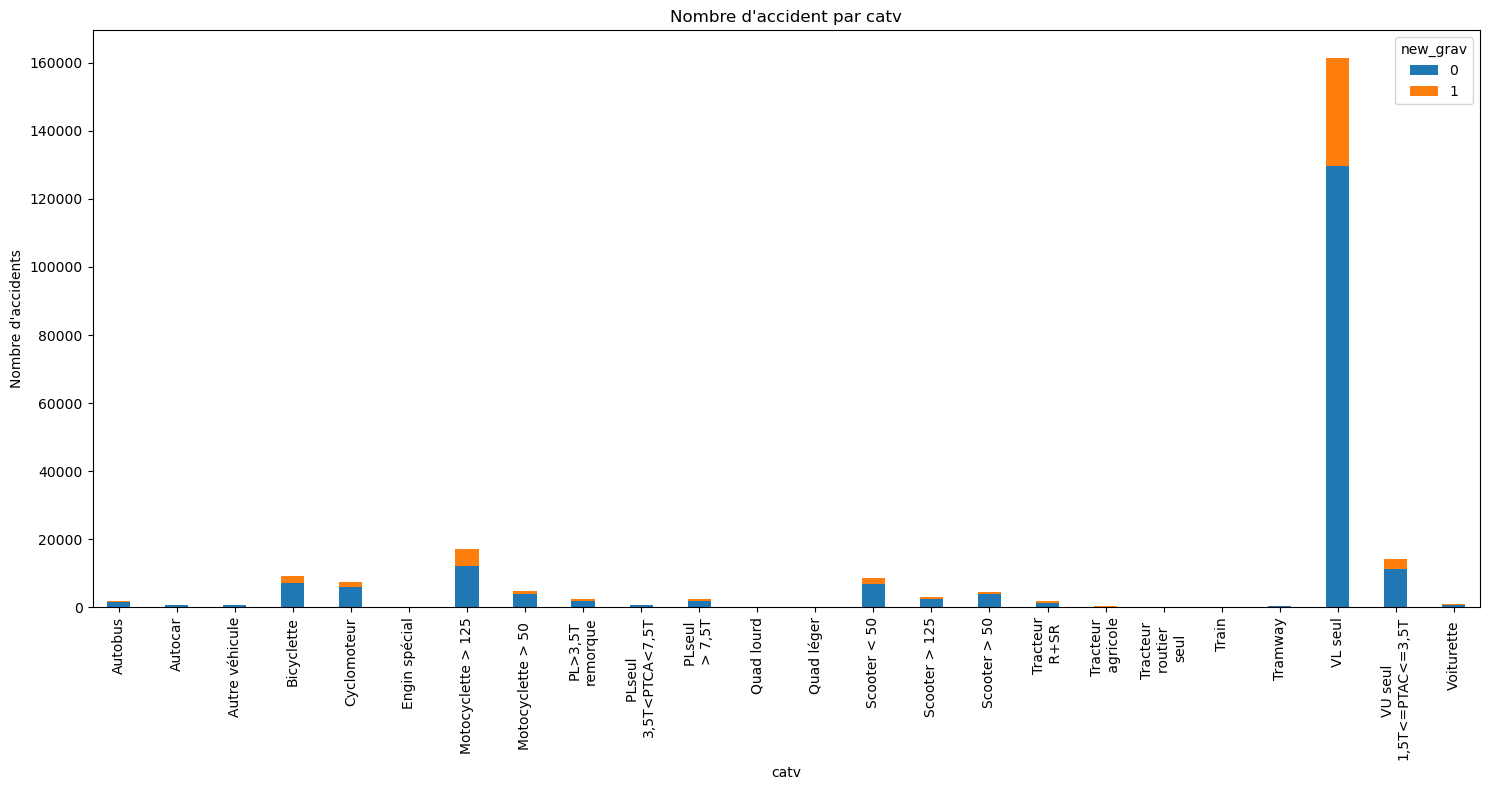

In [30]:
graph_together("catv",15,8,0.4,90,acci=acci_df)

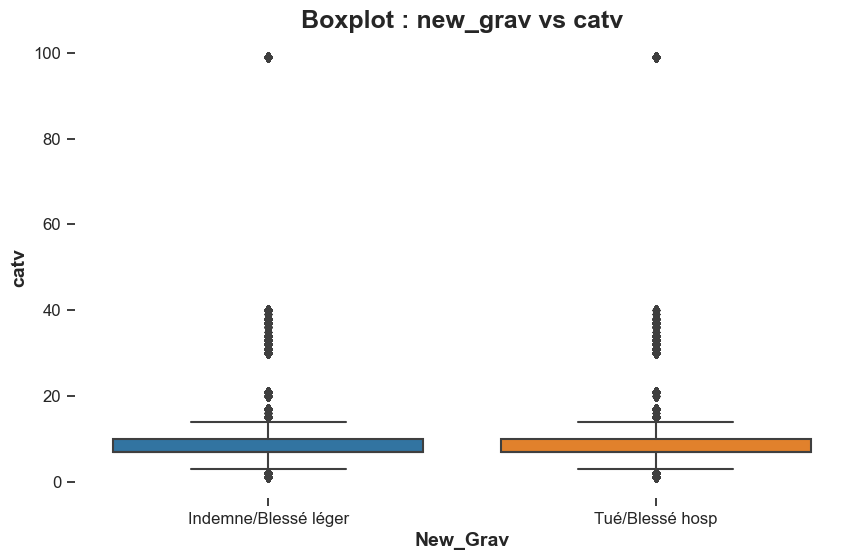

In [31]:
boxplot_graph("catv",accidents=acci_df)

Nous constatons que le nombre d'accidents mortels et d'accidents avec blessures légères est causé par des véhicules de type VL seul, ce qui peut se justifier par le nombre de véhicules roulants sur les routes et dans les rues, ainsi que par les limites de vitesse autorisées pour ce type de véhicules.

In [32]:
val_aber("catv")

il n'y a pas de valeurs aberrantes dans la colonne CATV


*3 premiers véhicules*

- 7 : VL seul
- 33 : Motocyclette > 125
- 10 – VU seul 1,5T <= PTAC <= 3,5T

#### Obstacle fixe heurté

In [33]:
print(acci_df["obs"].value_counts())

0     220730
1       4618
13      2436
3       2414
4       2260
2       2216
6       1954
14      1915
8       1743
12       895
15       717
9        680
16       632
7        362
11       312
10       203
5        200
Name: obs, dtype: Int64


In [34]:
val_aber("obs")

il n'y a pas de valeurs aberrantes dans la colonne OBS


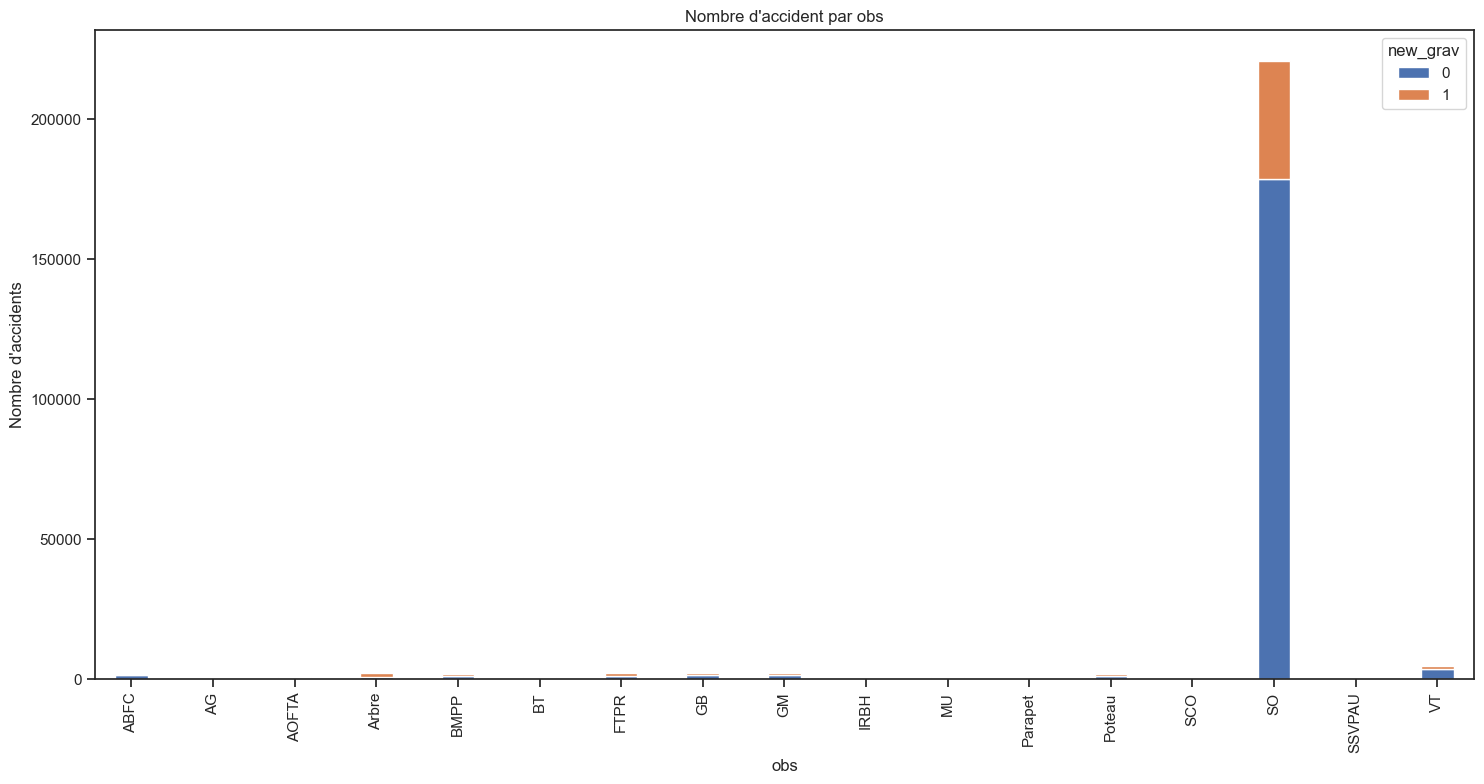

In [35]:
graph_together("obs",15,8,0.4,90,acci=acci_df)

Les accidents causés par des voitures qui n'ont heurté aucun objet sont bien plus nombreux que tous les types d'objets mobiles. Ils sont également moins mortels. 

#### Obstacle mobile heurté

In [36]:
val_aber("obsm")

il n'y a pas de valeurs aberrantes dans la colonne OBSM


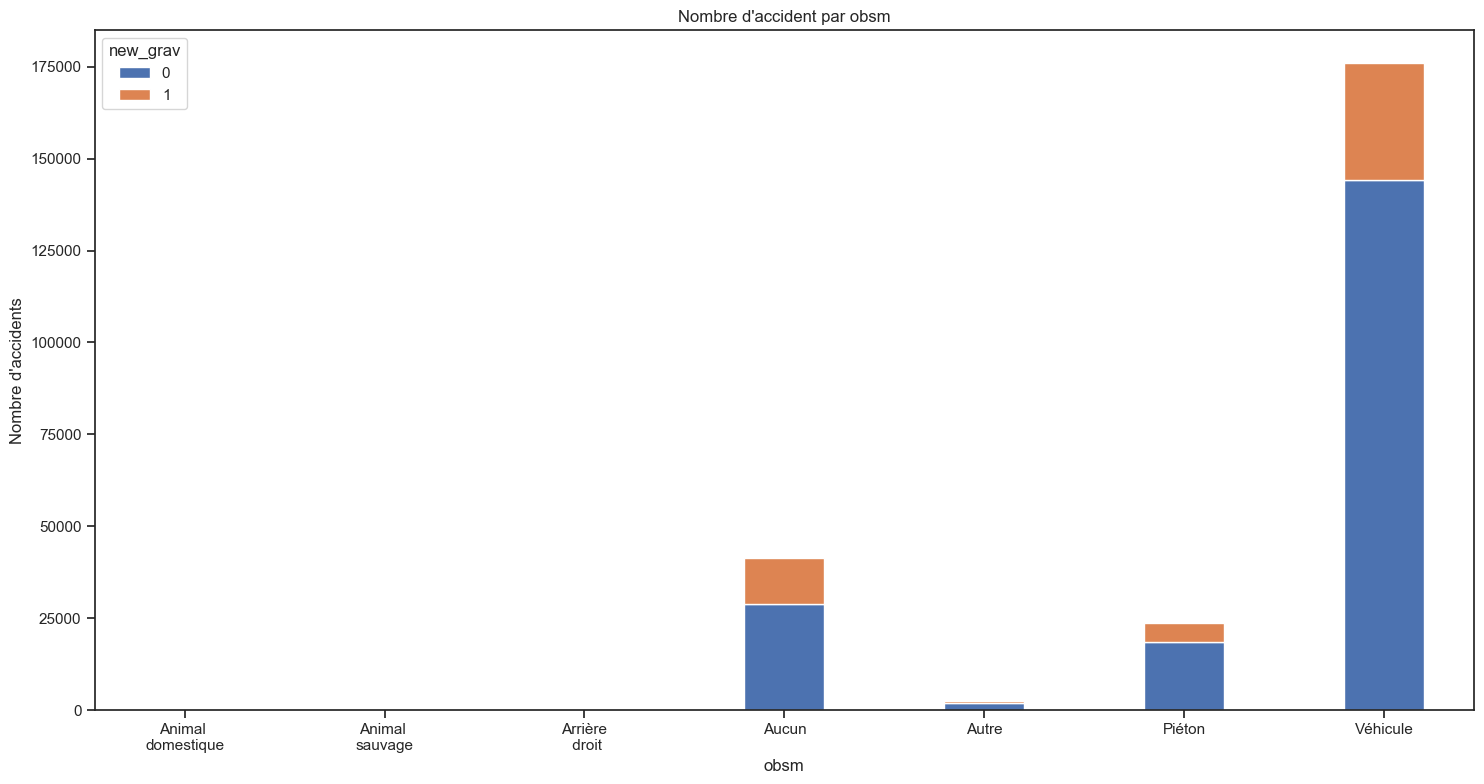

In [37]:
graph_together("obsm",15,8,0.4,0,acci=acci_df)

Nous remarquons que les objets mobiles touchés sont d'autres véhicules et que leur pourcentage de mortalité est inférieur à celui des accidents ayant causé des blessures légères, 

#### Point de choc initial 

In [38]:
val_aber("choc")

il n'y a pas de valeurs aberrantes dans la colonne CHOC


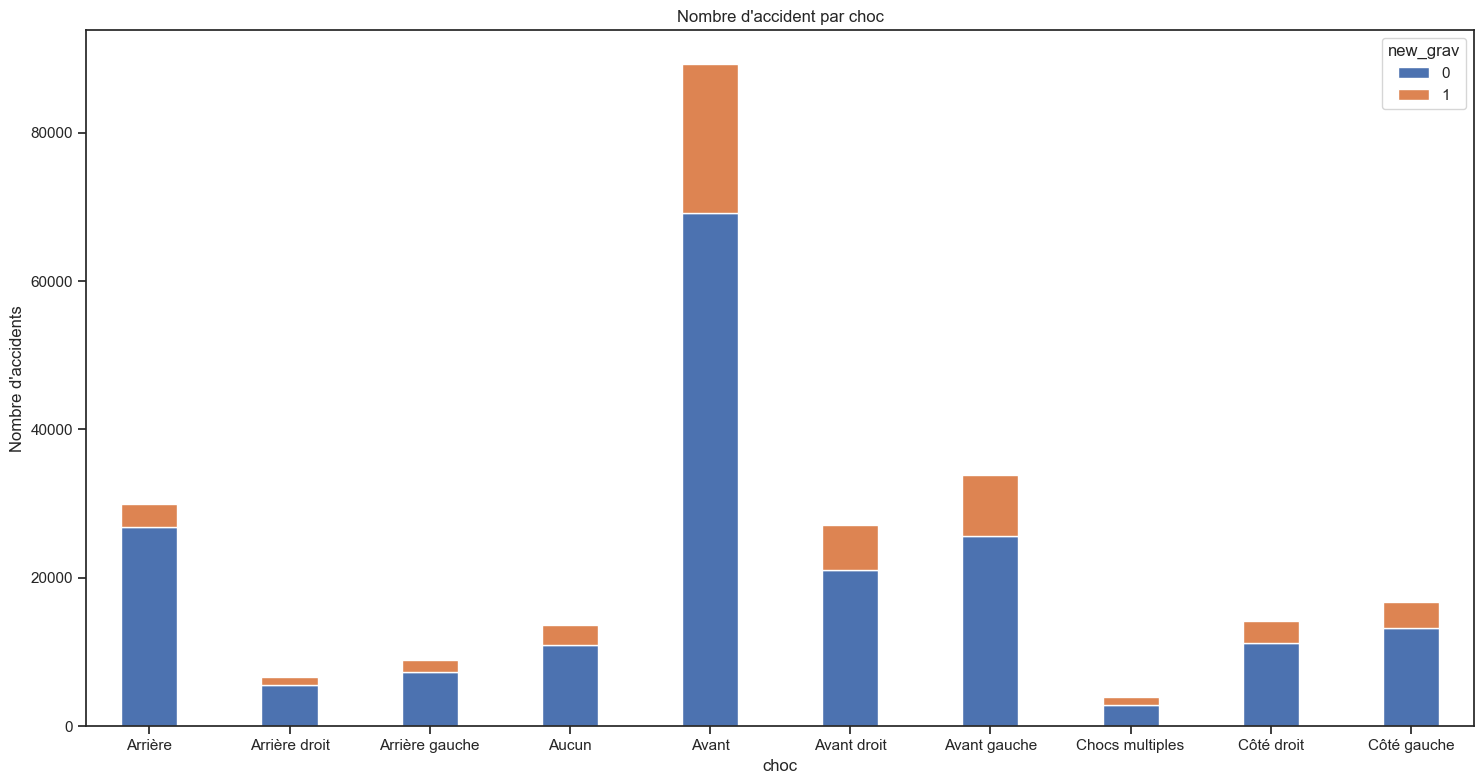

In [39]:
 graph_together("choc",15,8,0.4,0,acci=acci_df)

Nous remarquons que les accidents mortels se produisent souvent lors de chocs frontaux, ce qui peut être causé par l'impact du choc, et tant que les chocs sont frontaux, cela peut être produit par deux voitures en direction opposée, l'énergie potentielle est plus élevée et le choc devient plus mortel.

#### Manoeuvre principale avant l’accident

In [40]:
val_aber("manv")

il n'y a pas de valeurs aberrantes dans la colonne MANV


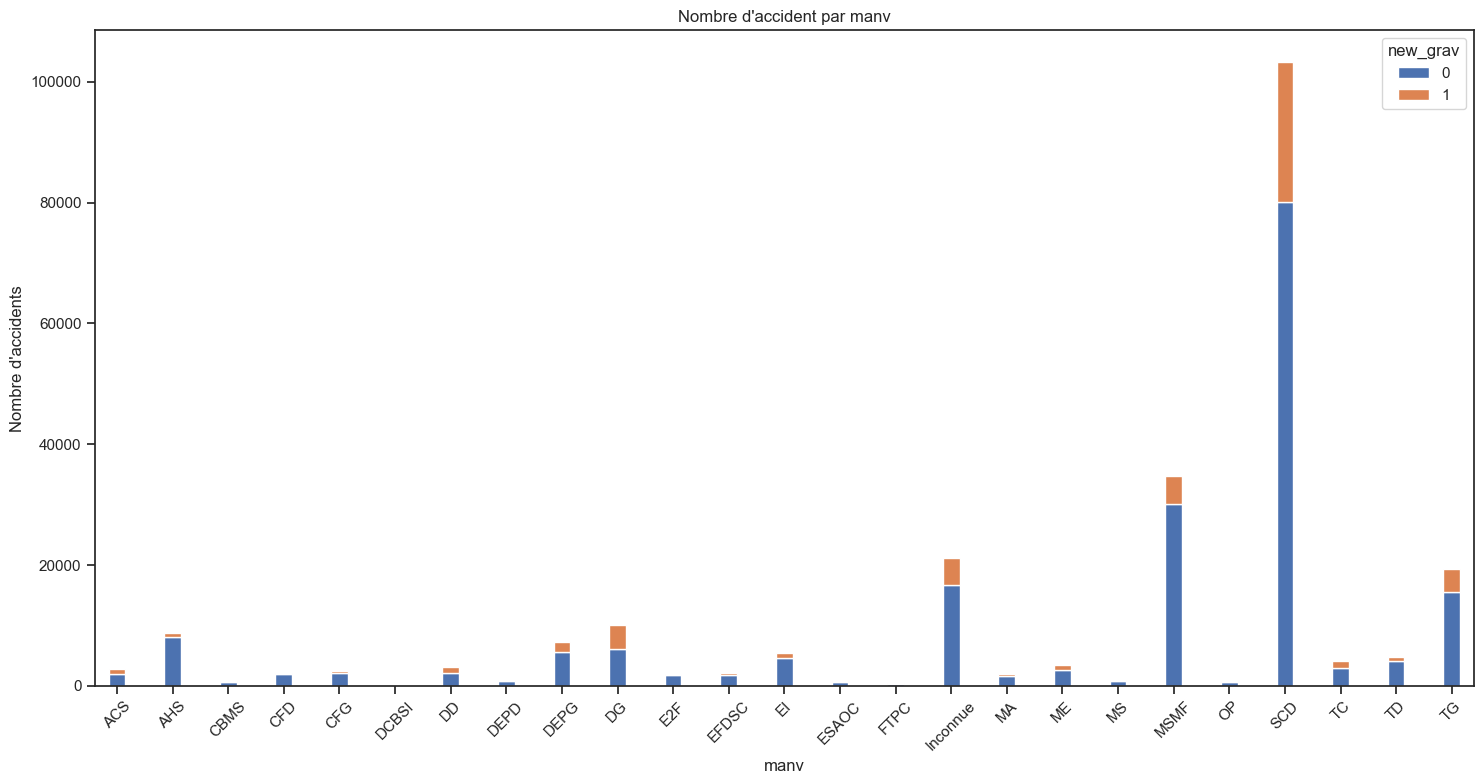

In [41]:
graph_together("manv",15,8,0.3,45,acci=acci_df)

Un pourcentage très élevé des accidents enregistrés est causé par des voitures à manoeuvre principale avant l’accident est sans changement de direction. une proportion importantes  des accidents est mortelle.

#### 4-2. Victimes

##### Gategorie de l'usager CATU

In [42]:
val_aber("catu")

Les valeurs aberrantes de la colonne CATU sont :
[4]


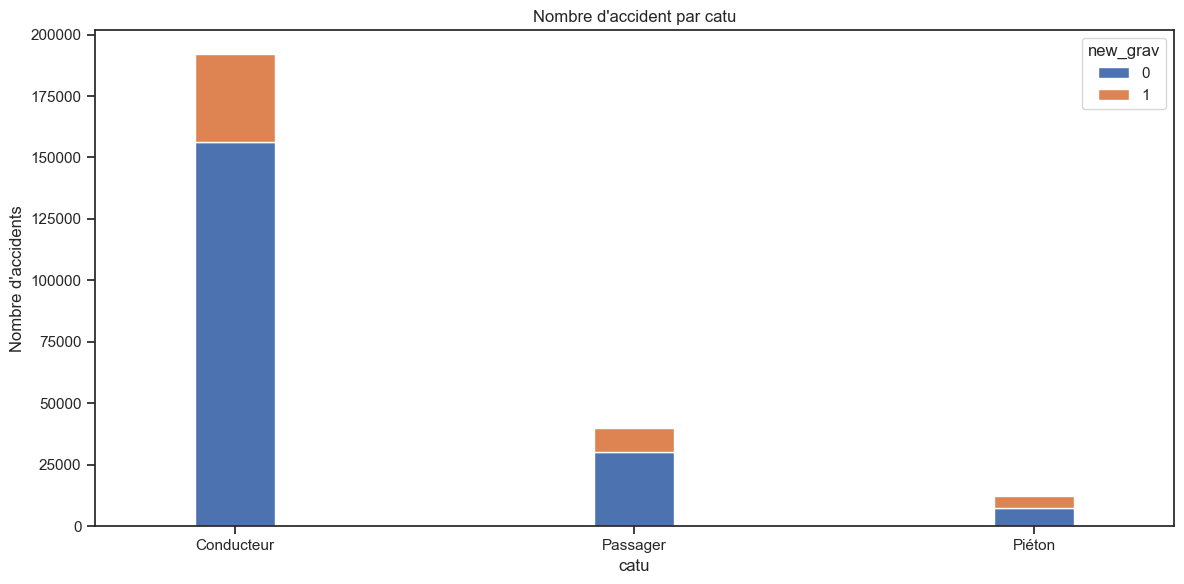

In [43]:
graph_together("catu",12,6,0.2,0,acci=acci_df)

On constate que les accidents survenus sont plus mortels pour les conducteurs, ces derniers étant plus susceptibles de mourir lors d'un accident.

In [44]:
accidents=accidents[accidents["catu"]!=4]

##### Gravité de l'accident NEW_GRAV

In [45]:
val_aber("grav")

il n'y a pas de valeurs aberrantes dans la colonne GRAV


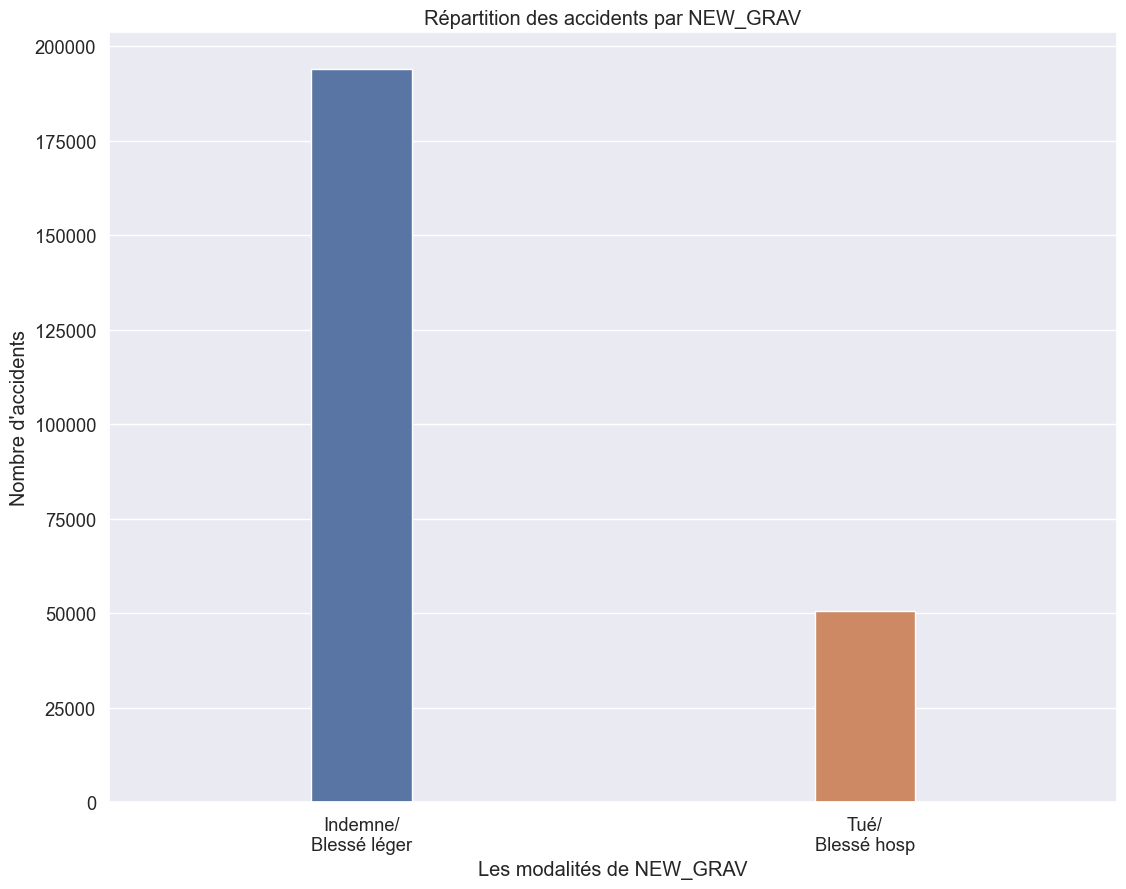

In [46]:
ploter("new_grav",13,0.2,0,acci_df)

On constate que les accidents indemnisés sont bien plus nombreux que les accidents mortels.

#### La répartition des victimes selon le SEXE

In [47]:
val_aber("sexe")

il n'y a pas de valeurs aberrantes dans la colonne SEXE


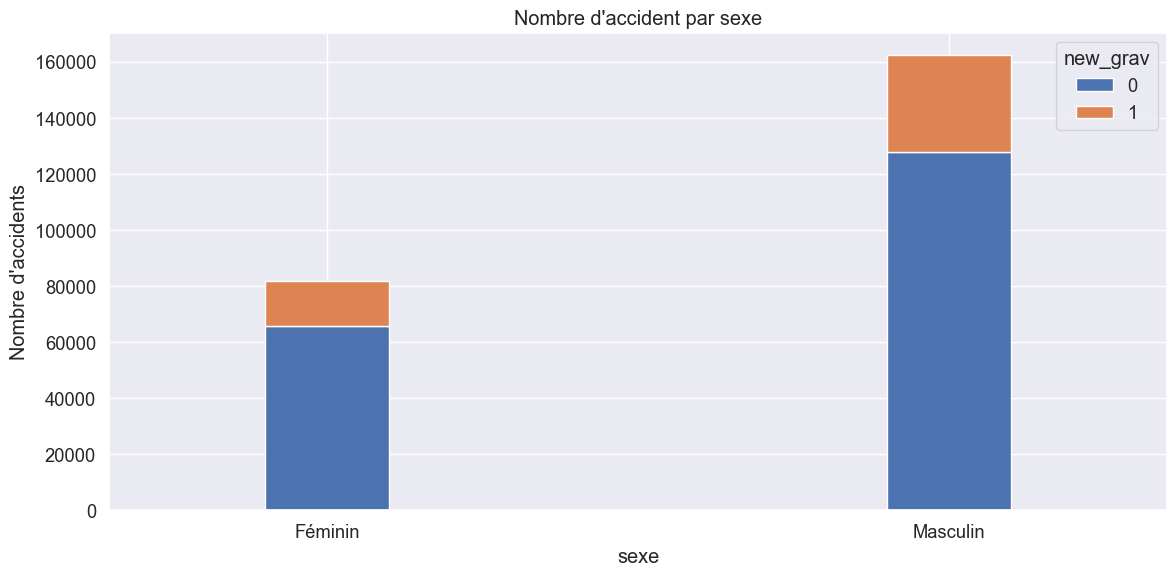

In [48]:
graph_together("sexe",12,6,0.2,0,acci=acci_df)

Nous constatons que les hommes ont causé plus d'accidents que les femmes, et que la mortalité des accidents causés par les hommes est très élevée par rapport à celle des femmes, nous pouvons en déduire que le sexe a un impact sur la prédiction de la gravité de l'accident.

#### La répartition des victimes selon l'année de naissance AN_NAIS

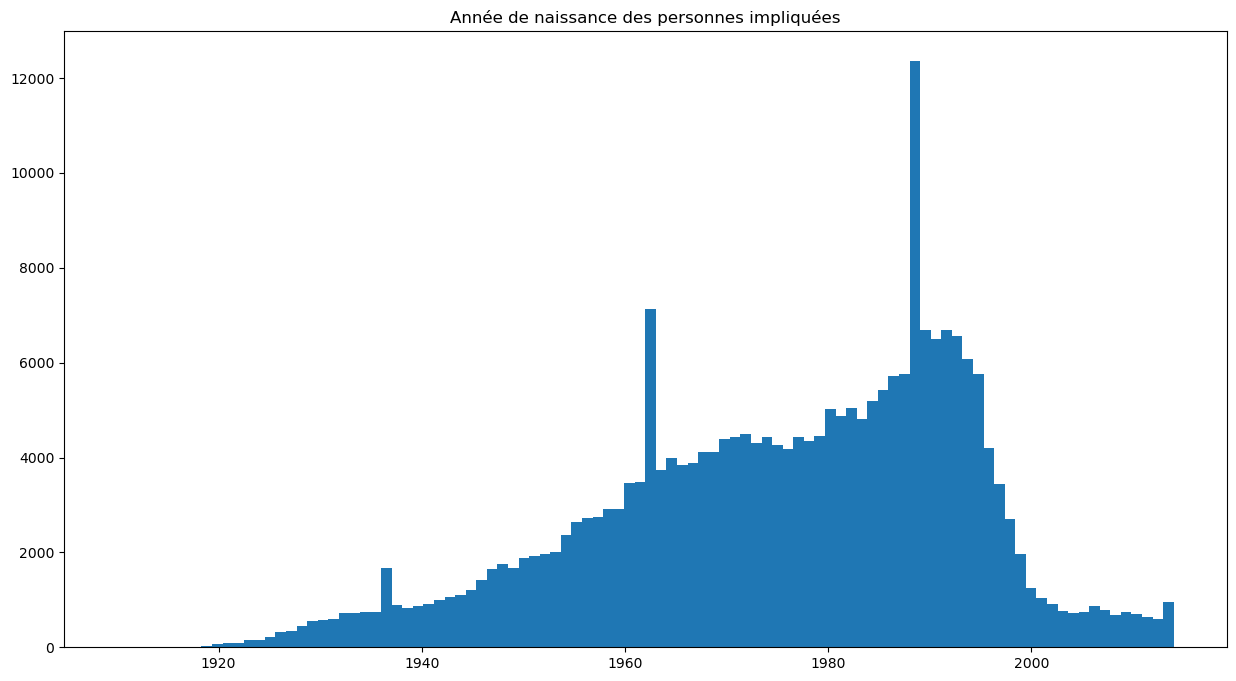

In [79]:
# Année de naissance
plt.figure(figsize=(15,8))
plt.hist(accidents['an_nais'], bins=100)
plt.title('Année de naissance des personnes impliquées')
plt.show()

Test sur les valeurs abberantes

Valeurs aberrantes: 
        Num_Acc  mois  jour  hrmn  lum  agg  int  atm  col  com  ...  \
198        1041     2     4  1130    1    2    1    7    6   70  ...   
682        1167     9    21  1700    1    2    1    1    6   38  ...   
698        1171     1     8  1845    5    2    1    2    6  259  ...   
741        1183     9    27  2030    3    1    1    1    6  111  ...   
769        1192     5    28  1315    1    2    1    1    6    8  ...   
...         ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
237900    58247    11     8  1645    1    2    1    1    6   28  ...   
238282    58337     4     6   145    3    1    1    1    1   12  ...   
238283    58337     4     6   145    3    1    1    1    1   12  ...   
240771    58883    10    25   845    1    2    4    1    7    1  ...   
243732    59620     2     1  2030    4    2    1    1    7   16  ...   

       num_veh_x senc  catv  occutc  obs  obsm  choc  manv num_veh_y  new_grav  
198          A01    0     7      

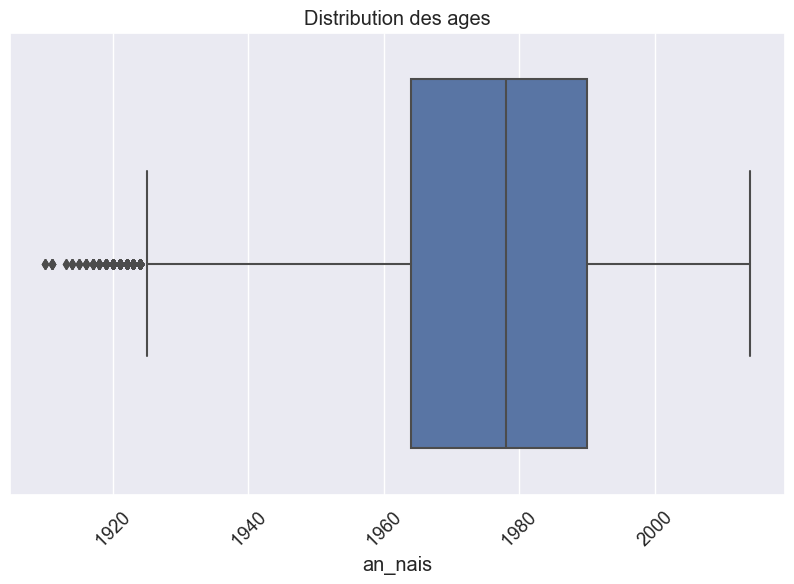

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x='an_nais', data=acci_df)
plt.xticks(rotation=45)
plt.title('Distribution des ages')

# calculer les limites inférieures et supérieures en utilisant la méthode de Tukey
Q1 = acci_df['an_nais'].quantile(0.25)
Q3 = acci_df['an_nais'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identifier les valeurs aberrantes
outliers = acci_df[(acci_df['an_nais'] < lower_bound) | (acci_df['an_nais'] > upper_bound)]
print("Valeurs aberrantes: ")
print(outliers)


On  remarque des valeurs aberrantes, des années de naissance non logiques, compte tenu de l'obligation d'avoir plus de 18 ans pour pouvoir utiliser un véhicule, on remarque aussi des années de naissance inférieures à 1905.
la majorité des valeurs oscillent entre 1960 et 1990.

Nous allons supprimer les valeurs aberrantes, mais avant cela, nous devons identifier la limite inférieure des âges dans l'ensemble de données, c'est pourquoi nous allons effectuer le test ci-dessous.

In [51]:
# Calculer l'intervalle interquartile (IQR)
Q1 = acci_df['an_nais'].quantile(0.25)
Q3 = acci_df['an_nais'].quantile(0.75)
IQR = Q3 - Q1

# Calculer la borne inférieure du boxplot
lower_bound = Q1 - 1.5 * IQR

print("Limite inférieure du diagramme en boîte:", lower_bound)

Limite inférieure du diagramme en boîte: 1925.0


In [52]:
#On supprime les valeurs de an_nais qui sont moins que 1925
accidents = accidents[accidents['an_nais'] >= 1925]

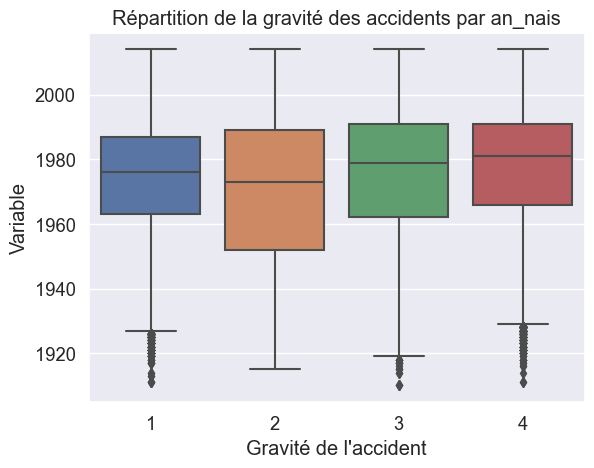

In [53]:
box_plot("an_nais","grav",data=acci_df)

##### Position des personnes impliquées dans l'accident PLACE

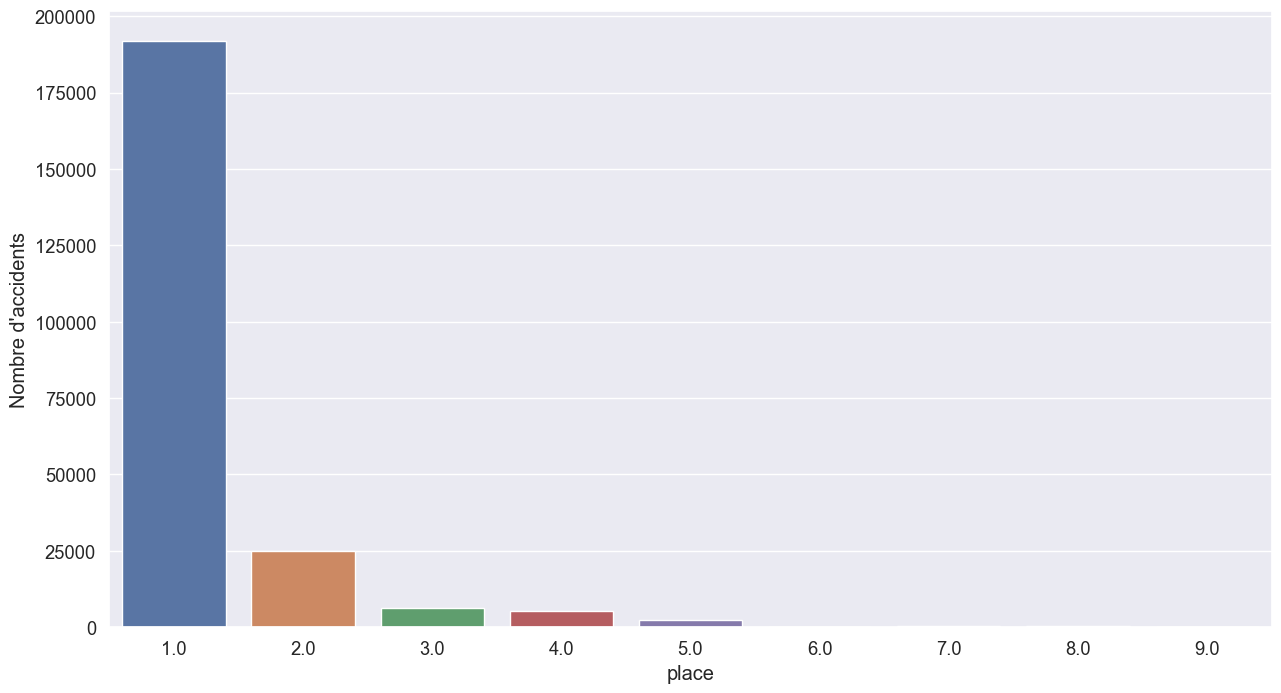

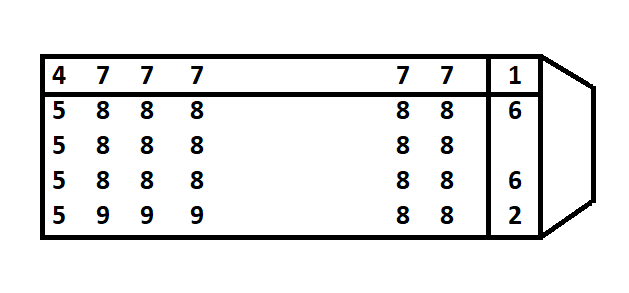

<Figure size 640x480 with 0 Axes>

In [54]:
from IPython.display import Image
acci_place = acci_df.dropna(subset=['place'])
plt.figure(figsize=(15,8))
sns.countplot(x='place', data=acci_place)
plt.ylabel("Nombre d'accidents")
plt.show()
plt.savefig("images/place.png")
del acci_place
Image(filename='transport_commun.png')

#### Sécurité des usagers SECU

In [55]:
val_aber("secu")

Les valeurs aberrantes de la colonne SECU sont :
[11, 21, 13, 22, 12, 23, 31, 91, 41, 42, 92, 93, 32, 33, 43]


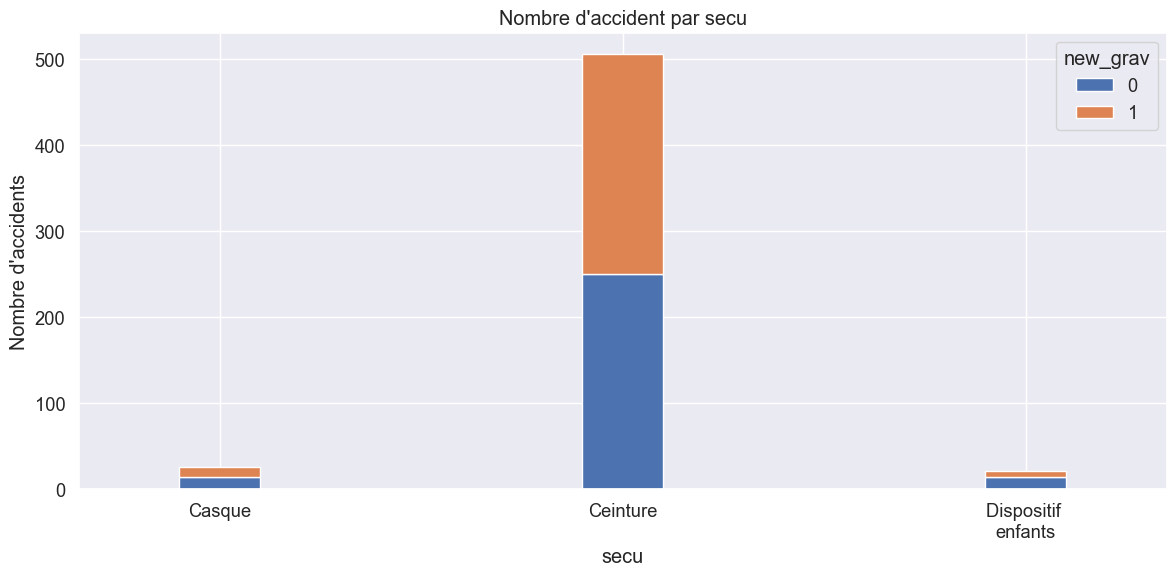

In [56]:
graph_together("secu",12,6,0.2,0,acci=acci_df)

La variable secu n'accepte que les catégories 0,1,2,3,4,5,6,7,8,9 mais nous constatons l'existence de quelques valeurs aberrantes qui ne sont pas décrites dans les documents d'instructions, nous les imputerons car elles n'ont aucune signification en ce qui concerne l'ensemble de données et le problème concerné.

In [57]:
acci_df["secu"].unique()

<IntegerArray>
[11, 21, <NA>, 13, 22, 12, 3, 23, 31, 91, 1, 41, 42, 92, 93, 2, 32, 33, 43]
Length: 19, dtype: Int64

In [58]:
print(acci_df['secu'].value_counts())

11    146437
21     42499
13     21024
93     14837
23      4868
12      2914
22      2244
31      2128
91      1014
92       770
1        508
41       425
43       230
42       215
33        89
32        77
2         26
3         23
Name: secu, dtype: Int64


La colonne secu prend la valeur 11  plus de 60% et  la valeur 21 de plus de 17% et elle prend 13 de plus de 8% et elle prend également la valeur 93 de plus de 6%, cela fait un total de plus de 91 %, et aucune de ces valeurs n'est représentée dans la description des ensembles de données, et ces valeurs ne représentent aucune catégorie, cela n'apportera aucune importance à notre analyse, et la solution appropriée est d'imputer cette colonne.

In [59]:
accidents = accidents.drop('secu', axis = 1)

#### Motif du déplacement au moment de l’accident TRAJET

In [60]:
val_aber("trajet")

Les valeurs aberrantes de la colonne TRAJET sont :
[9]


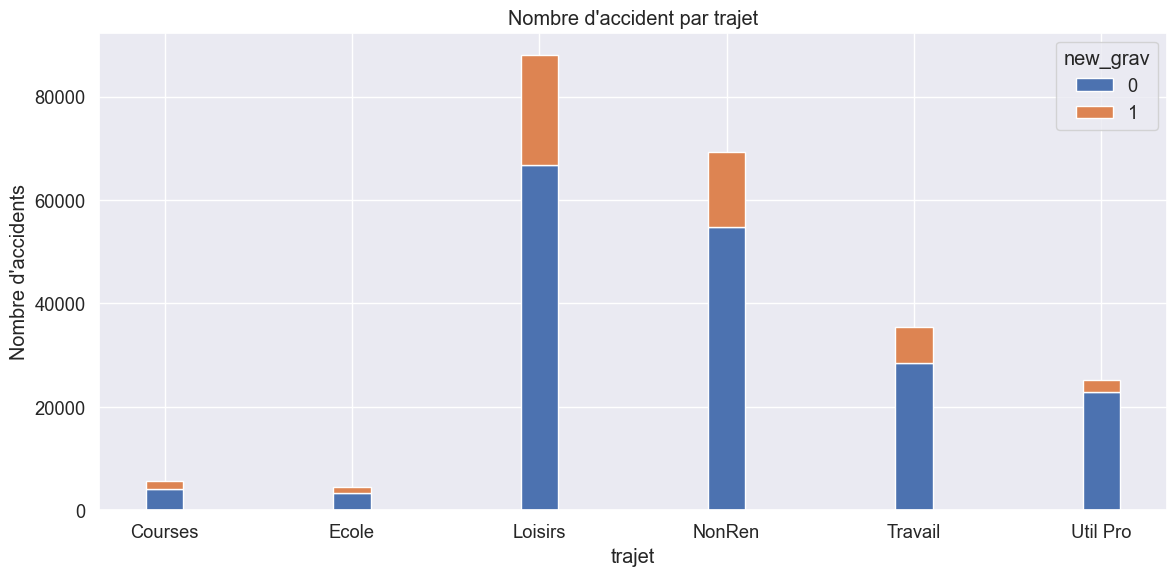

In [61]:
graph_together("trajet",12,6,0.2,0,acci=acci_df)

Les accidents se produisent souvent lorsque l'objet de la promenade est le loisir, il y a aussi une proportion importante d'accidents mortels qui ont causé la mort et l'hospitalisation des victimes dans la catégorie du loisir.

In [62]:
print(acci_df['trajet'].value_counts())

5    88470
0    69594
1    35510
4    25278
9    15325
3     5656
2     4575
Name: trajet, dtype: Int64


On va supprimer les lignes ou il y'a la valeur 9 qui ne represente aucune categorie de la variable trajet


In [63]:
accidents = accidents[~accidents['trajet'].isin(list_a_suppr('trajet',accidents=accidents))]

#### Action du piéton ACTP

In [64]:
val_aber("actp")

il n'y a pas de valeurs aberrantes dans la colonne ACTP


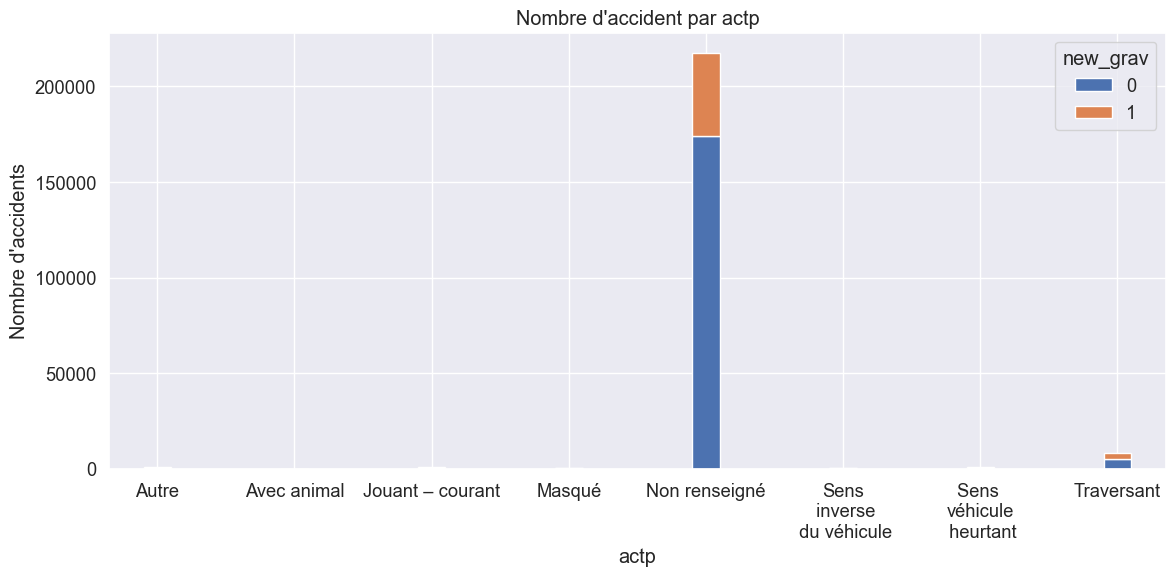

In [65]:
graph_together("actp",12,6,0.2,0,acci=acci_df)

In [66]:
print(acci_df['actp'].value_counts())

0    232234
3      9064
9       826
1       710
5       698
2       347
4       210
6        25
Name: actp, dtype: Int64


La modalité 0 représente l'action du piéton Non renseigné, elle n'apporte aucune valeur ajoutée à l'analyse, la solution est de supprimer cette colonne car la modalité 0 est dominante mais nous n'obtenons aucune information sur l'impact de la variable actp sur la gravité de l'accident.

In [67]:
accidents=accidents.drop(columns="actp")

#### 4-3. Lieux

#### Catégorie de route CATR

In [68]:
val_aber("catr",acci_df)

il n'y a pas de valeurs aberrantes dans la colonne CATR


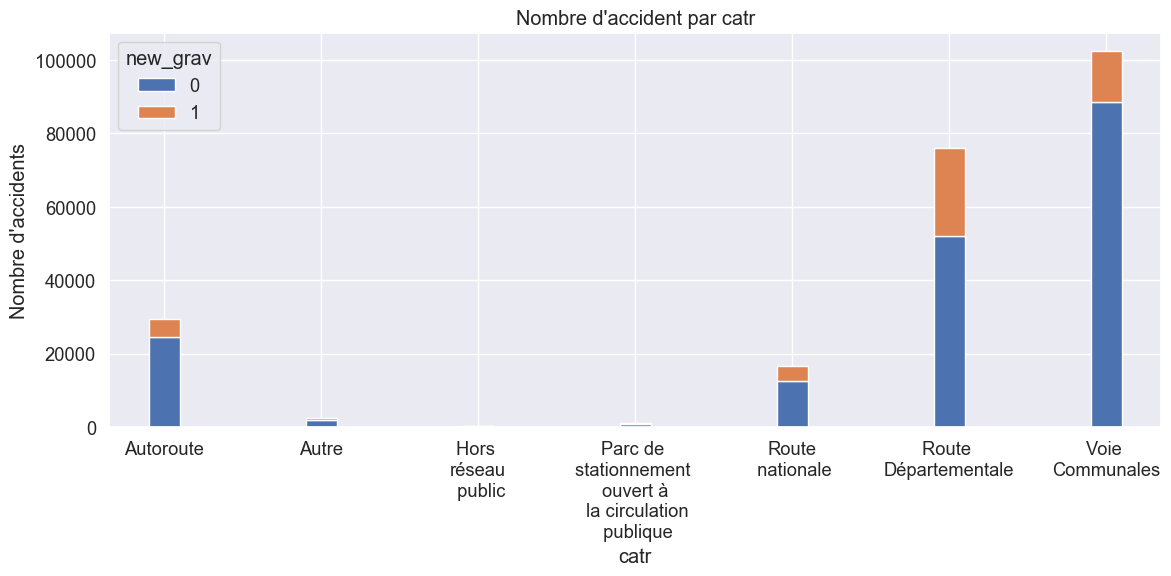

In [69]:
graph_together("catr",12,6,0.2,0,acci=acci_df)

Les accidents se produisent le plus souvent sur les voies communes , ce qui s'explique par leur densité de circulation, de leurs routes étroites et de la présence de conducteurs non familiers. mais il sont mois mortels que ceux des routes départementaires qui causes une proportion d'accidents mortels.

#### Régime de circulation CIRC

In [70]:
val_aber("circ",acci_df)

Les valeurs aberrantes de la colonne CIRC sont :
[0]


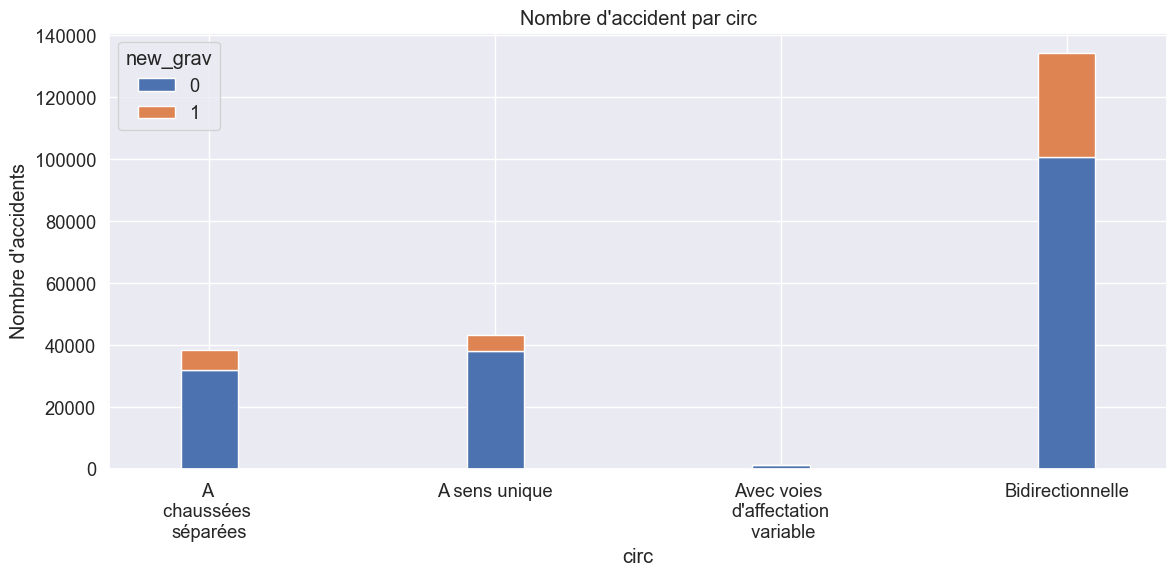

In [71]:
graph_together("circ",12,6,0.2,0,acci=acci_df)

On constate qu'il y a moins d'accidents mortels dans les rues à sens unique. Ceci est probablement lié au fait que ce type de régime de circulation est plus fréquent en ville, mais également au fait qu'il empêche les collisions frontales, plus violentes. Contrairement aux routes bidimensionnelles ont une chaussée étroite avec peu d'espace pour les véhicules qui circulent dans des directions opposées, ce qui peut augmenter les risques de collision frontale, l'une des causes les plus graves d'accidents de la route.

Nous allons supprimer les lignes où la variable circ prend zéro comme valeur

In [72]:
accidents = accidents[~accidents['circ'].isin(list_a_suppr('circ',accidents=accidents))]

#### Nombre total de voies de circulation NBV

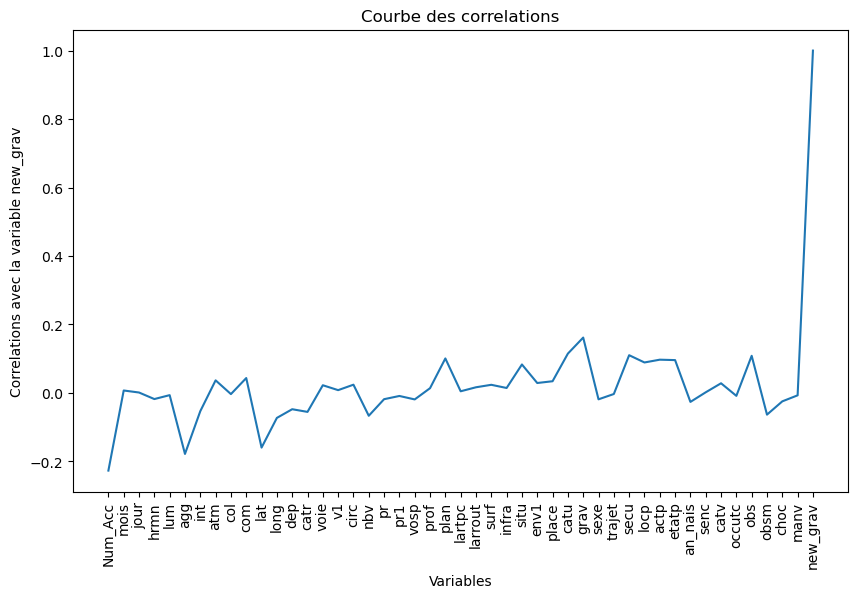

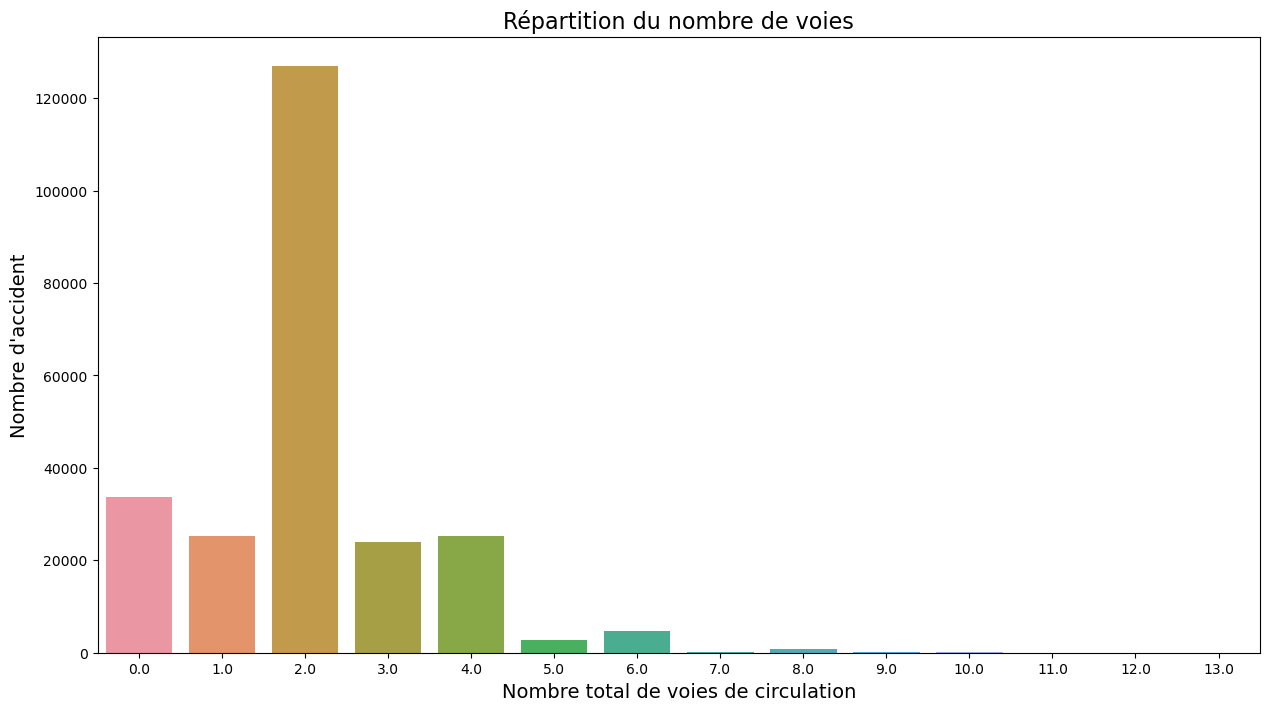

In [74]:
plt.figure(figsize=(15,8))
sns.countplot(x='nbv', data=acci_df)
plt.title('Répartition du nombre de voies', fontsize=16)
plt.xlabel('Nombre total de voies de circulation', fontsize=14)
plt.ylabel("Nombre d'accident", fontsize=14)
plt.show()

Les accidents surviennent souvent sur les routes à deux voies par rapport aux routes à plus de deux voies en raison de plusieurs raisons telles que la présence d'intersections, de virages serrés, de lignes continues qui rendent difficile les dépassements et la nécessité de partager la route avec les véhicules venant en sens inverse. De plus, ces routes ont généralement une limite de vitesse plus élevée que les routes à plusieurs voies, ce qui augmente les risques d'accidents en cas d'erreur de conduite ou de comportement imprudent sur la route.

#### Voie réservée VOSP

In [74]:
val_aber("vosp",acci_df)

il n'y a pas de valeurs aberrantes dans la colonne VOSP


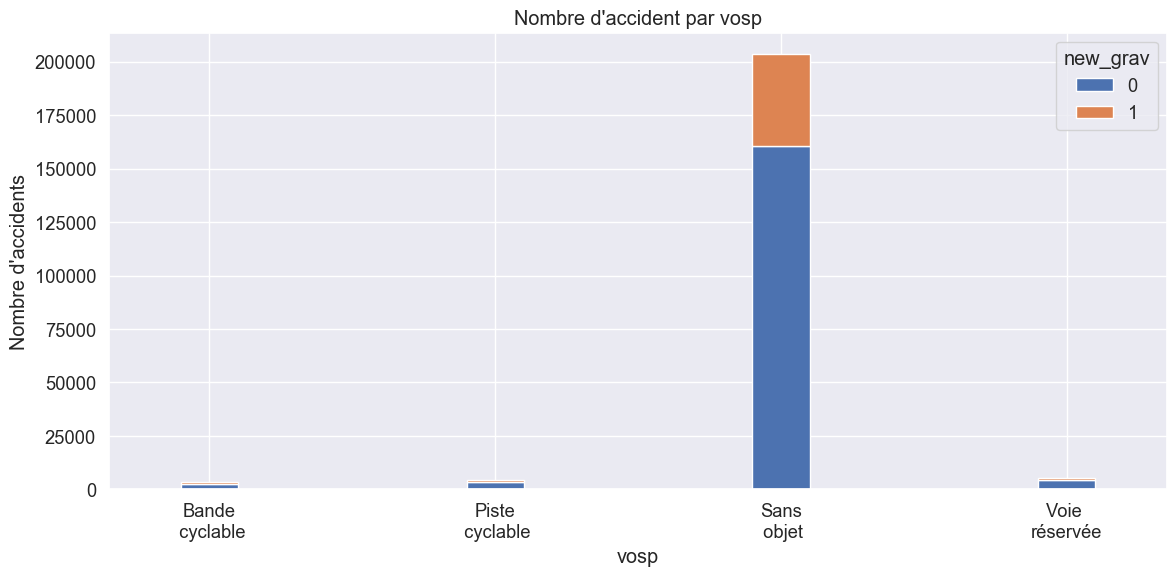

In [75]:
graph_together("vosp",12,6,0.2,0,acci=acci_df)

Les accidents sont plus mortels lorsqu'il s'agit de la catégorie Sans Objet, c'est aussi la dominante par rapport aux autres catégories.

#### Profile de la place des accidents PROF

In [76]:
val_aber("prof")

Les valeurs aberrantes de la colonne PROF sont :
[0]


In [77]:
(acci_df["prof"].value_counts()/len(acci_df))*100

1    75.432999
2    13.988088
0     7.422543
3     1.812581
4     1.155209
Name: prof, dtype: Float64

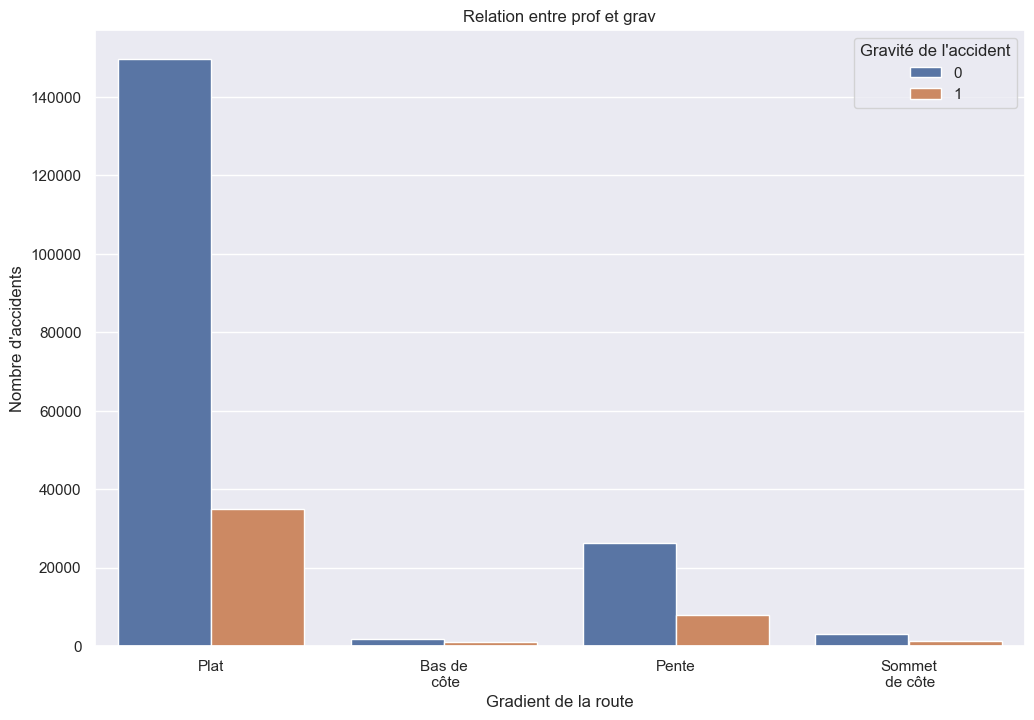

In [78]:
# créer un dictionnaire pour faire correspondre les valeurs de la colonne "prof" aux noms correspondants
prof_names = var_dic["prof"]

# remplacer les valeurs de la colonne "prof" par les noms correspondants du dictionnaire
acci_prof = acci_df.copy()
acci_prof=acci_df[acci_df["prof"]!=0]
acci_prof['prof'] = acci_prof['prof'].map(prof_names)

# créer un graphique de comptage pour explorer la relation entre 'prof' et 'grav'
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.countplot(x='prof', hue='new_grav', data=acci_prof)
plt.title('Relation entre prof et grav')
plt.xlabel('Gradient de la route')
plt.ylabel('Nombre d\'accidents')
plt.legend(title='Gravité de l\'accident')
plt.show()

Les accidents indemnes et les accidents ayant causé des blessures légères se produisent souvent sur les routes et les surfaces planes, ce qui peut être décrit par la simplicité de ce type d'infrastructures,

Nous allons supprimer les lignes où la variable prof prend zéro comme valeur

In [79]:
accidents = accidents[~accidents['prof'].isin(list_a_suppr('prof',accidents=accidents))]

#### Tracé en plan PLAN

In [80]:
val_aber("plan")

Les valeurs aberrantes de la colonne PLAN sont :
[0]


la modalité 0 ne représente aucune modalité compte tenu des instructions, nous devrons supprimer ces valeurs dans le plan de colonne.

In [81]:
accidents=accidents[accidents["plan"]!=0]

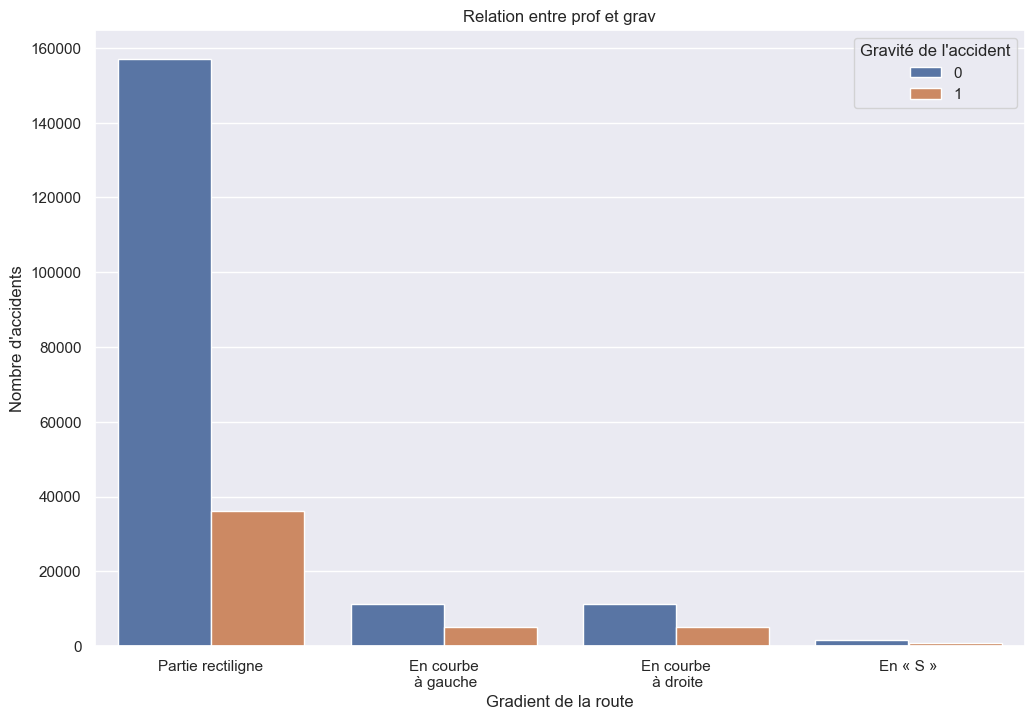

In [82]:
# créer un dictionnaire pour faire correspondre les valeurs de la colonne "plan" aux noms correspondants
plan_names = var_dic["plan"]

# remplacer les valeurs de la colonne "plan" par les noms correspondants du dictionnaire
acci_plan = acci_df.copy()
acci_plan['plan'] = acci_plan['plan'].map(plan_names)

# créer un graphique de comptage pour explorer la relation entre 'prof' et 'grav'
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.countplot(x='plan', hue='new_grav', data=acci_plan)
plt.title('Relation entre prof et grav')
plt.xlabel('Gradient de la route')
plt.ylabel('Nombre d\'accidents')
plt.legend(title='Gravité de l\'accident')
plt.show()

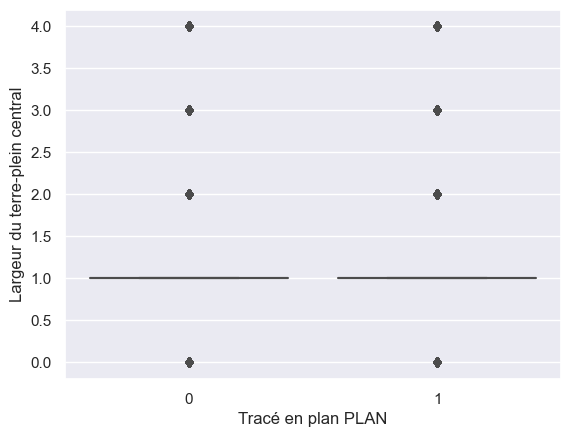

In [83]:
# créer un diagramme en boîte pour explorer la relation entre 'lartpc' et 'grav'
sns.boxplot(x='new_grav', y='plan', data=acci_df)
# ajouter des étiquettes aux axes
plt.xlabel("Tracé en plan PLAN")
plt.ylabel('Largeur du terre-plein central')
plt.show()

#### Largeur du terre-plein central LARTPC

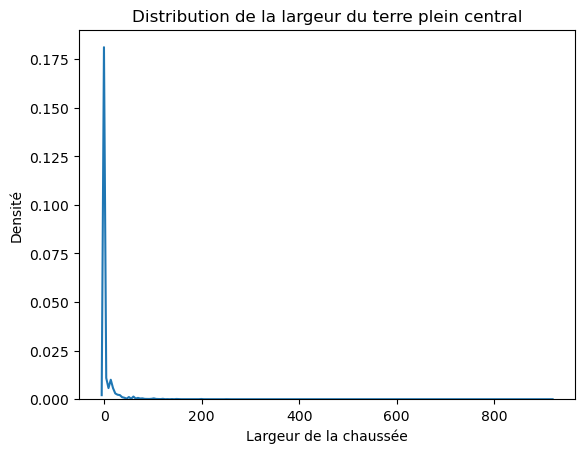

In [54]:
# créer un graphique de comptage avec une courbe au lieu de barres
sns.kdeplot(x='lartpc', data=acci_df)

# ajouter des étiquettes aux axes et un titre au graphique
plt.xlabel('Largeur de la chaussée')
plt.ylabel('Densité')
plt.title('Distribution de la largeur du terre plein central')

# afficher le tracé
plt.show()

Nous remarquons que les routes sans ou avec une bande médiane ont enregistré le pourcentage le plus élevé d'accidents, et dans le bloc de code ci-dessous nous allons visualiser l'effet de ce nombre de bandes médianes sur le nombre d'accidents en fonction de la gravité.

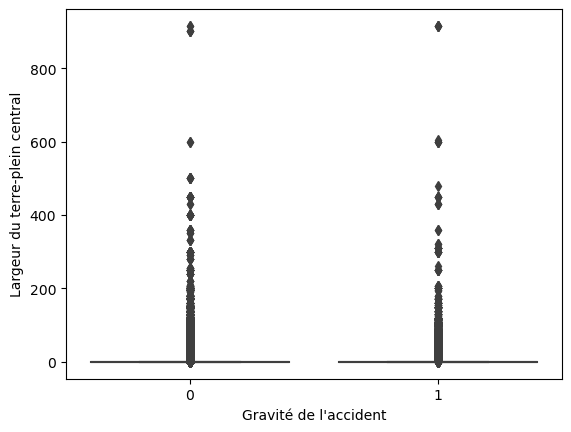

In [55]:
# créer un diagramme en boîte pour explorer la relation entre 'lartpc' et 'grav'
sns.boxplot(x='new_grav', y='lartpc', data=acci_df)
# ajouter des étiquettes aux axes
plt.xlabel("Gravité de l'accident")
plt.ylabel('Largeur du terre-plein central')
plt.show()

Plus la route est étroite, plus il y a d'accidents mortels. On peut déduire du graphique ci-dessus que les accidents mortels sont plus fréquents sur les routes à bande médiane étroite.

#### Largeur de la route LARROUT

Valeurs aberrantes: 
        Num_Acc  mois  jour  hrmn  lum  agg  int  atm  col  com  ...  \
179        1040     1     5  1700    1    1    1    8    4  225  ...   
180        1040     1     5  1700    1    1    1    8    4  225  ...   
181        1040     1     5  1700    1    1    1    8    4  225  ...   
182        1040     1     5  1700    1    1    1    8    4  225  ...   
183        1040     1     5  1700    1    1    1    8    4  225  ...   
...         ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
237295    58122    11     7  1630    2    2    1    1    3  118  ...   
237296    58122    11     7  1630    2    2    1    1    3  118  ...   
237297    58122    11     7  1630    2    2    1    1    3  118  ...   
237298    58122    11     7  1630    2    2    1    1    3  118  ...   
242908    59410    11    23  2100    3    1    1    1    7    7  ...   

       num_veh_x senc  catv  occutc  obs  obsm  choc  manv num_veh_y  new_grav  
179          A01    0     7      

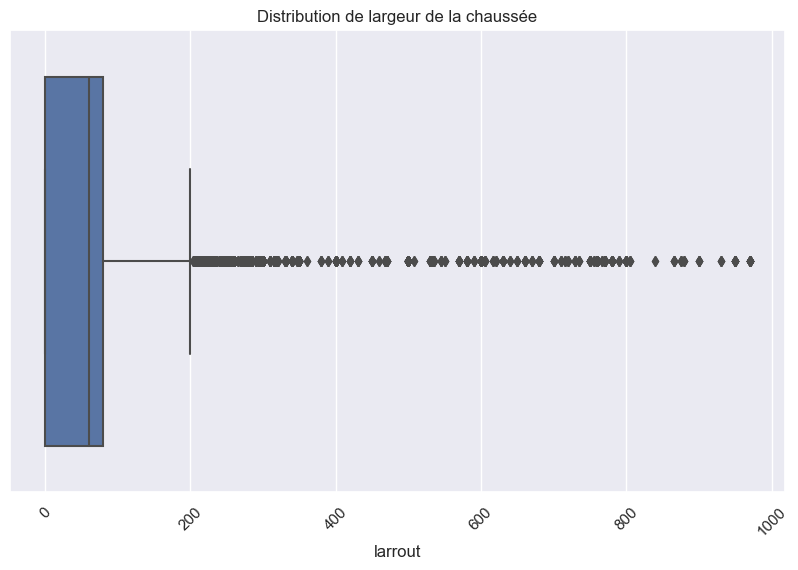

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(x='larrout', data=accidents)
plt.xticks(rotation=45)
plt.title('Distribution de largeur de la chaussée')

# calculer les limites inférieures et supérieures en utilisant la méthode de Tukey
Q1 = accidents['larrout'].quantile(0.25)
Q3 = accidents['larrout'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identifier les valeurs aberrantes
outliers = accidents[(accidents['larrout'] < lower_bound) | (accidents['larrout'] > upper_bound)]
print("Valeurs aberrantes: ")
print(outliers)

Nous remarquons quelques valeurs aberrantes, en particulier des longueurs supérieures à 200 mètres, certaines valeurs atteignant 800 m de long, ce qui est techniquement impossible, nous allons définir la limite supérieure et supprimer toutes les valeurs qui la dépassent.

In [87]:
#La borne sup des valeurs
upper_bound

200.0

In [88]:
#On supprime les valeurs de an_nais qui sont plus que 200
accidents = accidents[accidents['larrout'] <=200]

#### Etat de la surface  SURF

In [89]:
val_aber("surf",accidents=accidents)

Les valeurs aberrantes de la colonne SURF sont :
[0]


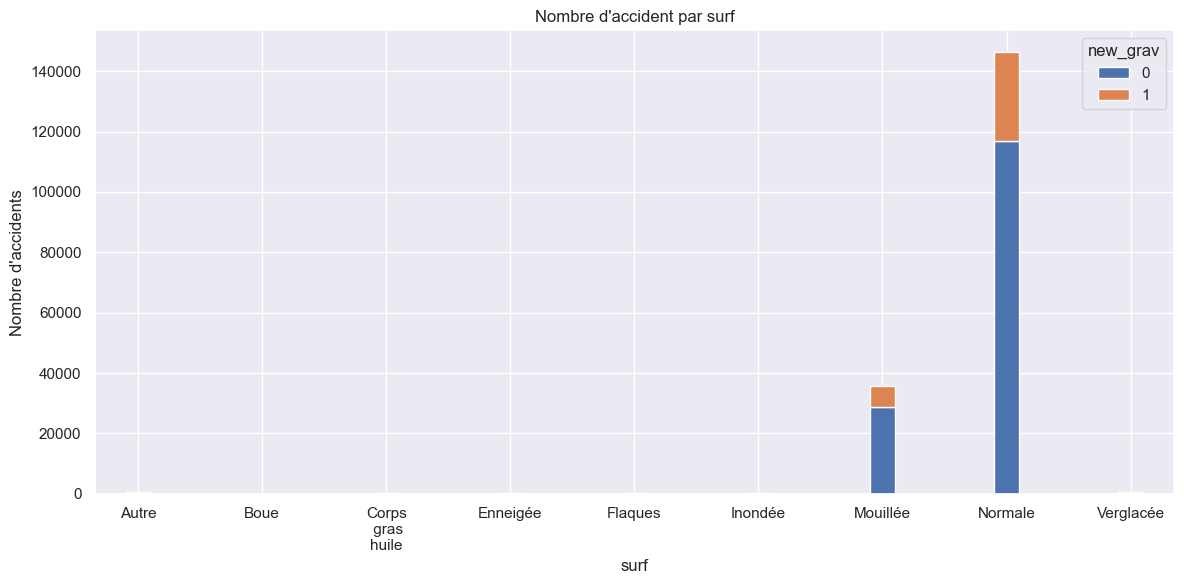

In [90]:
graph_together("surf",12,6,0.2,0,acci=acci_df)

Les accidents se produisent souvent sur les routes à revêtement normal, ce type de revêtement a rapporté une proportion importante d'accidents moraux de la classe 1, ceci peut s'expliquer par le fait que ces routes sont plus fréquentes et utilisées par les conducteurs et les passagers.

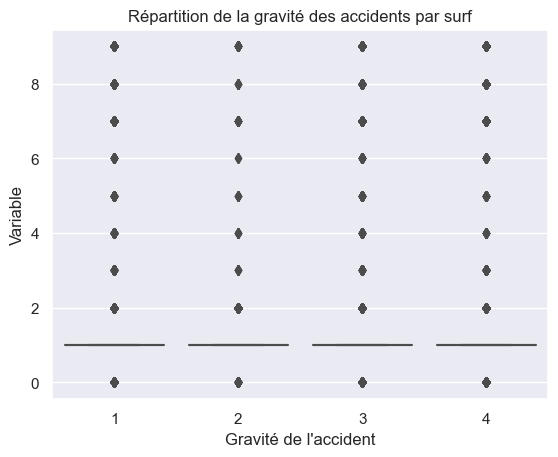

In [91]:
box_plot("surf","grav")

Les accidents mortels sont davantage condensés autour du type de surface, ainsi que d'autres types de gravité.

In [92]:
accidents=accidents[accidents["surf"]!=0]

#### Type d'infrastructure INFRA

In [93]:
val_aber("infra")

il n'y a pas de valeurs aberrantes dans la colonne INFRA


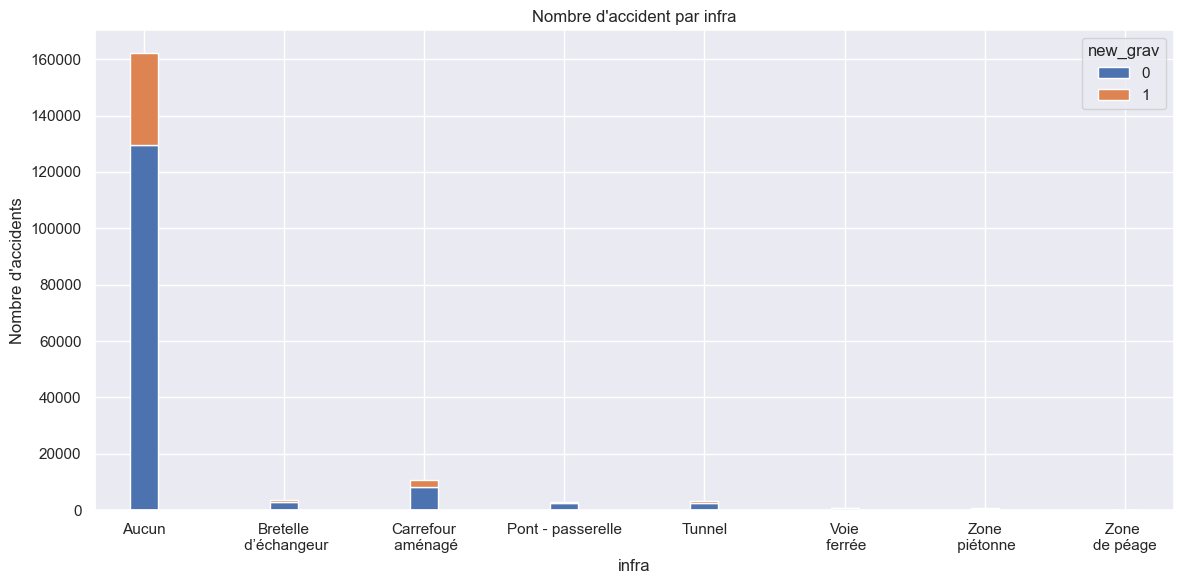

In [94]:
graph_together("infra",12,6,0.2,0,acci=acci_df)

Les routes dépourvues d'autres infrastructures ont enregistré un nombre élevé d'accidents et d'accidents ayant entraîné la mort ou l'hospitalisation, ce qui peut s'expliquer par la vitesse élevée d'un grand nombre de conducteurs qui entraîne des accidents, contrairement par exemple aux tunnels, où la vitesse est très réglementée et très limitée, ainsi qu'aux passages pour piétons où les panneaux de signalisation organisent le trafic.

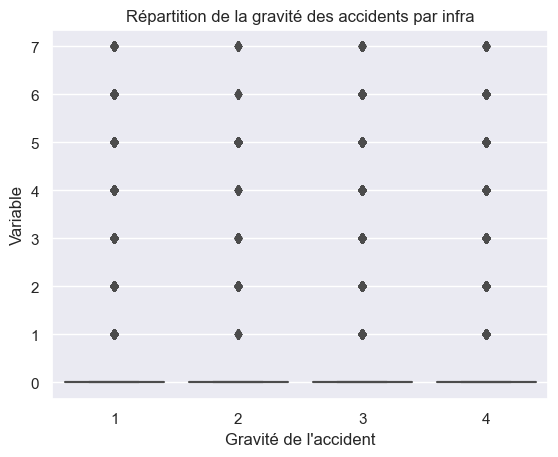

In [95]:
box_plot("infra","grav")

Les accidents mortels sont davantage condensés autour du type d'infrastructure, ainsi que d'autres types de sévérité.

#### Situation de l’accident SITU

In [96]:
val_aber("situ")

il n'y a pas de valeurs aberrantes dans la colonne SITU


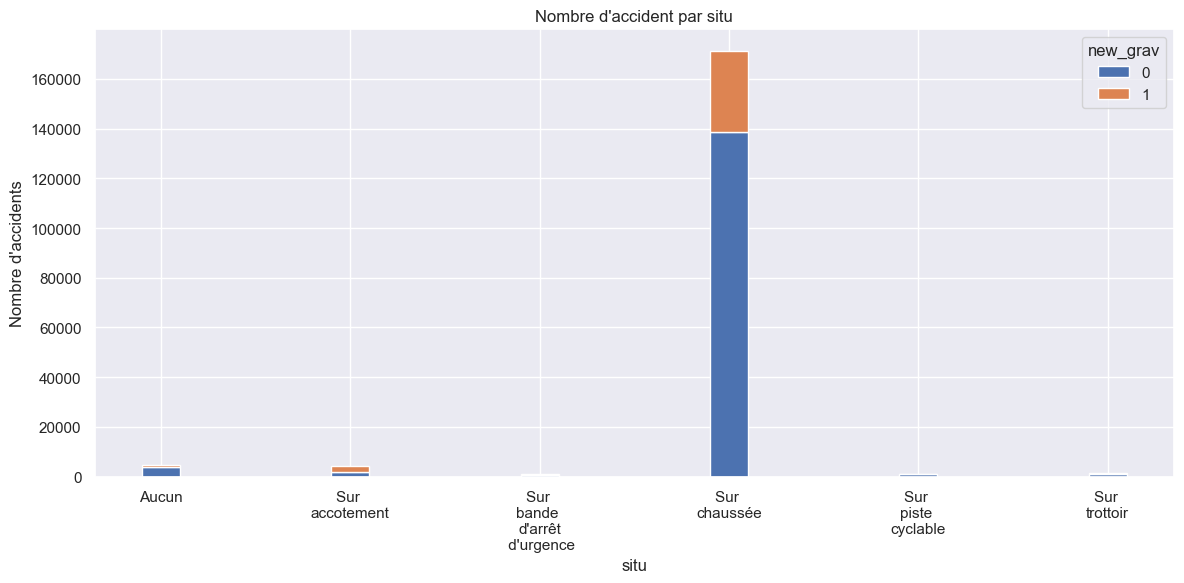

In [97]:
graph_together("situ",12,6,0.2,0,acci=acci_df)

Les accidents se produisent le plus souvent sur les chaussées car elles sont souvent des routes à grande circulation avec beaucoup de véhicules différents qui y circulent. De plus, les chaussées peuvent être des routes étroites avec peu d'espace pour les véhicules, ce qui peut rendre le dépassement et le croisement plus difficiles.

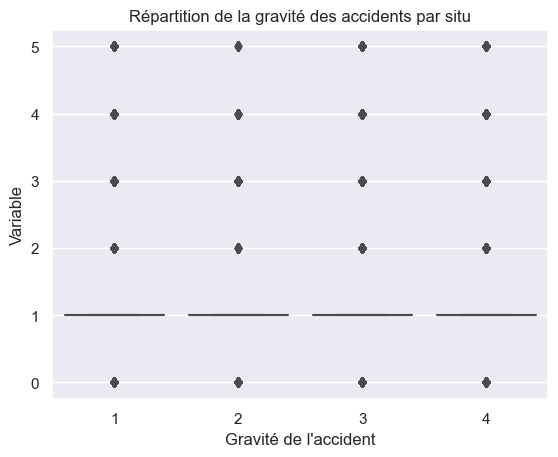

In [98]:
box_plot("situ","grav")

The mortal accidents are condensed more around the type of place of occurrence of the accidents, as well as other types of severity.

## 4- 4. Caracteristiques

#### Le temps des accidents HRMN

In [99]:
#Ce code convertit le temps en H:M:S
accidents['hrmn'] = accidents['hrmn'].astype(str).str.zfill(4)
accidents['hrmn'] = accidents['hrmn'].str[:-2].str.zfill(2) + ':' + accidents['hrmn'].str[-2:].str.zfill(2)
accidents['hrmn'] = pd.to_datetime(accidents['hrmn'], format='%H:%M').dt.time

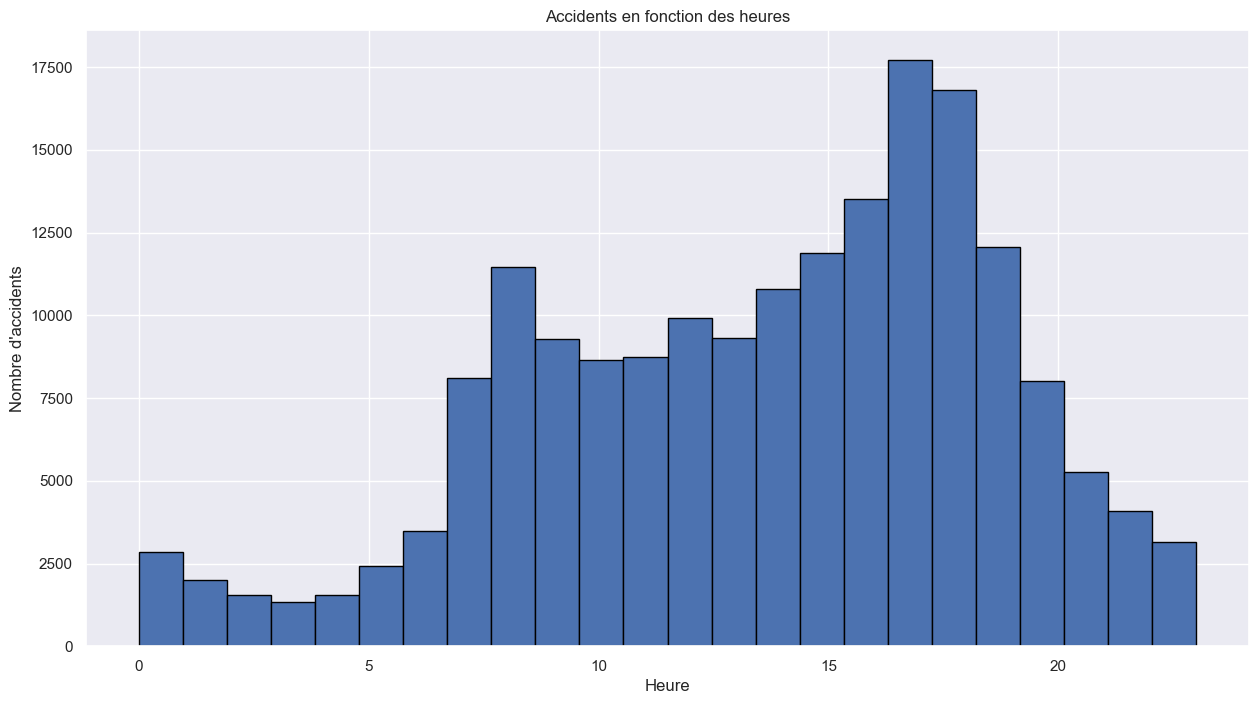

In [100]:
time_values = accidents['hrmn']

hours = [time.hour for time in time_values]
plt.figure(figsize=(15, 8))

plt.hist(hours, bins=24, edgecolor='black')
plt.xlabel('Heure')
plt.ylabel("Nombre d'accidents")
plt.title('Accidents en fonction des heures')
plt.savefig("images/heure_vs_accidents.png")
plt.show()

Nous constatons que les accidents se produisent souvent le soir, entre 17 et 19 heures, ce qui peut s'expliquer par l'importance du trafic, 

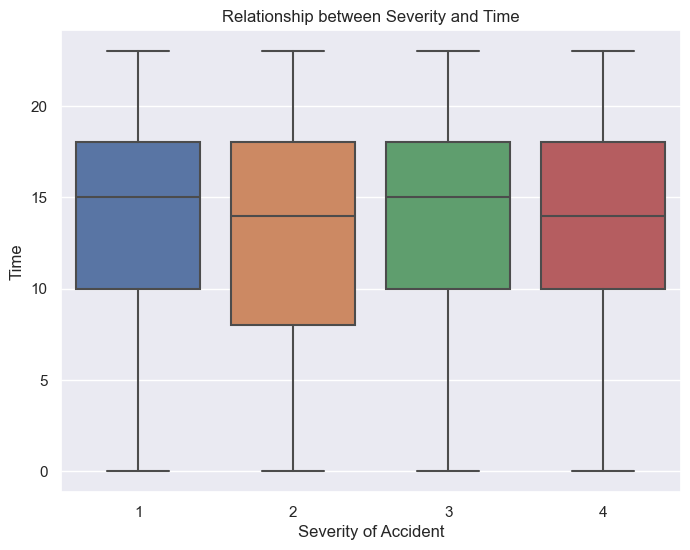

In [101]:
hours = [time.hour for time in time_values]

plt.figure(figsize=(8, 6))

sns.boxplot(x='grav', y=hours, data=accidents)
plt.xlabel('Severity of Accident')
plt.ylabel('Time')
plt.title('Relationship between Severity and Time')

plt.show()

La majorité des accidents ont lieu entre 15h et 19h. Il y a plusieurs raisons pour lesquelles les accidents sont plus fréquents pendant cette période.

L'heure de pointe : Cette période coïncide avec l'heure de pointe du soir, lorsque les gens rentrent chez eux après leur travail. L'augmentation du volume du trafic et des embouteillages pendant cette période peut entraîner une plus grande probabilité d'accidents.

Fatigue et distraction : Au fur et à mesure que la journée avance, les gens peuvent ressentir de la fatigue due au travail ou à d'autres activités, ce qui entraîne une baisse de la concentration et une augmentation du risque d'accident. En outre, les conducteurs peuvent être plus enclins à se laisser distraire pendant ces heures, par exemple en utilisant leur téléphone ou en se livrant à d'autres activités pendant qu'ils conduisent.

Conditions de visibilité : Selon la période de l'année, la fin de l'après-midi peut être associée à une visibilité réduite en raison de facteurs tels que le coucher du soleil ou l'éblouissement par le soleil. Une mauvaise visibilité peut augmenter le risque d'accident.

Activités scolaires ou récréatives : Dans de nombreux endroits, les heures d'école se terminent généralement l'après-midi, ce qui entraîne une augmentation de la circulation autour des écoles et des risques d'accidents impliquant des écoliers. En outre, les activités récréatives ou les événements qui se déroulent le soir peuvent attirer plus de monde sur les routes, augmentant ainsi la probabilité d'accidents.

#### Conditions d’éclairage

In [102]:
val_aber("lum",accidents=acci_df)

il n'y a pas de valeurs aberrantes dans la colonne LUM


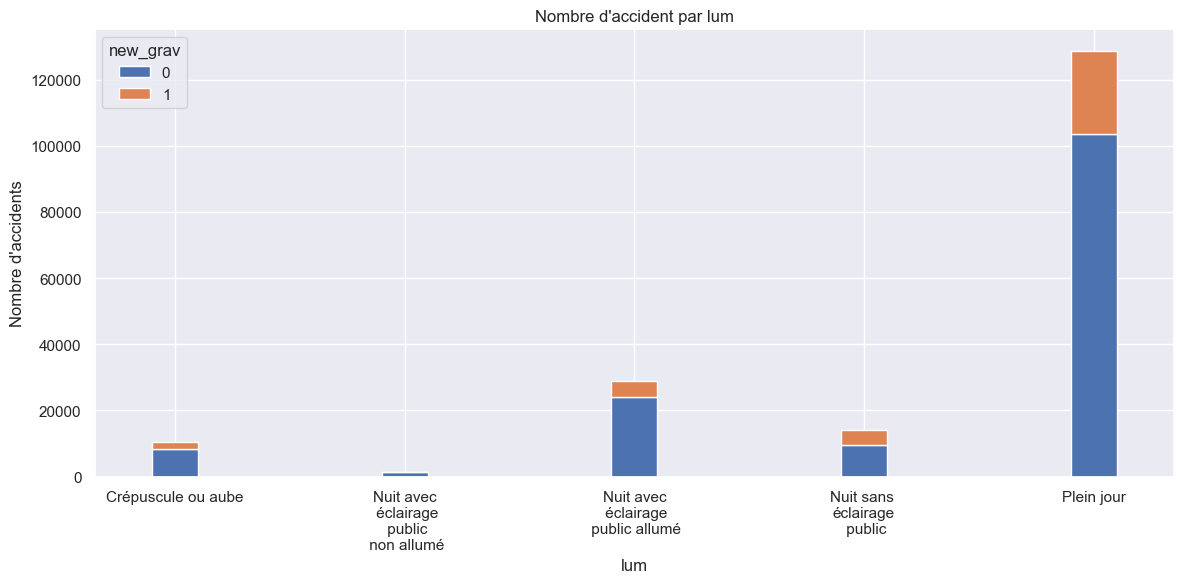

In [103]:
graph_together("lum",12,6,0.2,0,acci=acci_df)

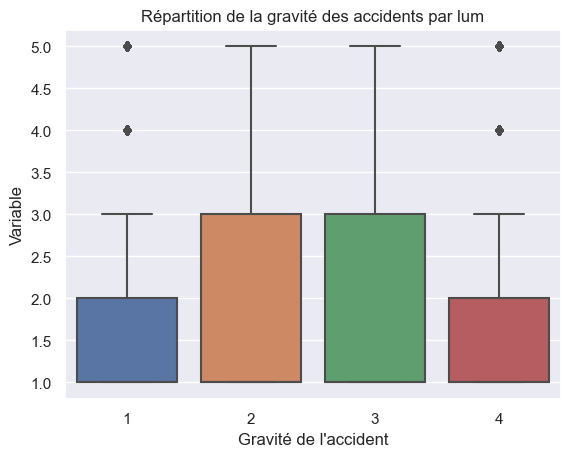

In [104]:
box_plot("lum","grav")

Les accidents mortels se produisent souvent à la lumière du jour, la nuit avec éclaire public, ce qui pourrait être justifié par l'absence de lumière suffisante pour la vision pendant la nuit, d'autre part pendant la lumière du jour, cela pourrait être décrit par la pleine visibilité qui entraîne une vitesse élevée de la part des utilisateurs des véhicules, et aussi le trafic intense pendant la journée.

#### Localisations des accidents AGG

In [105]:
val_aber("agg",accidents=acci_df)

il n'y a pas de valeurs aberrantes dans la colonne AGG


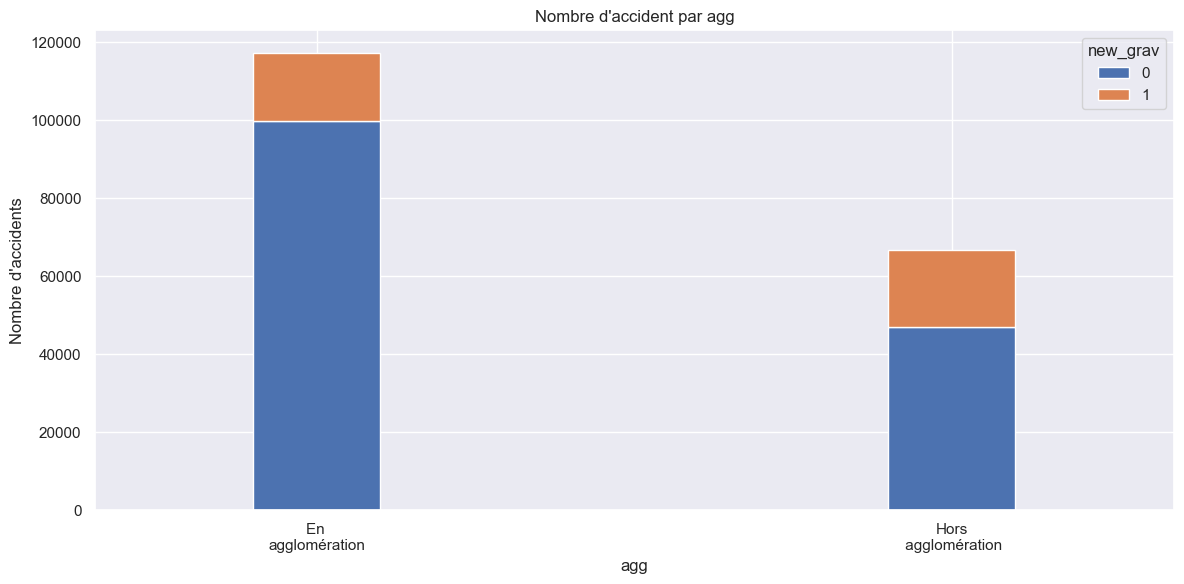

In [106]:
graph_together("agg",12,6,0.2,0,acci=acci_df)

Les accidents de type mortel sont plus fréquents hors agglomération qu'en agglomération, ce qui peut se justifier par l'excès de vitesse, tandis que les accidents de type Indemne et les accidents ayant causé des blessures légères sont plus fréquents en agglomération, ce qui peut se justifier par la vitesse plus faible au centre des villes et la présence de feux de signalisation qui organisent la circulation.

#### Intersection INT

In [107]:
val_aber("int")

il n'y a pas de valeurs aberrantes dans la colonne INT


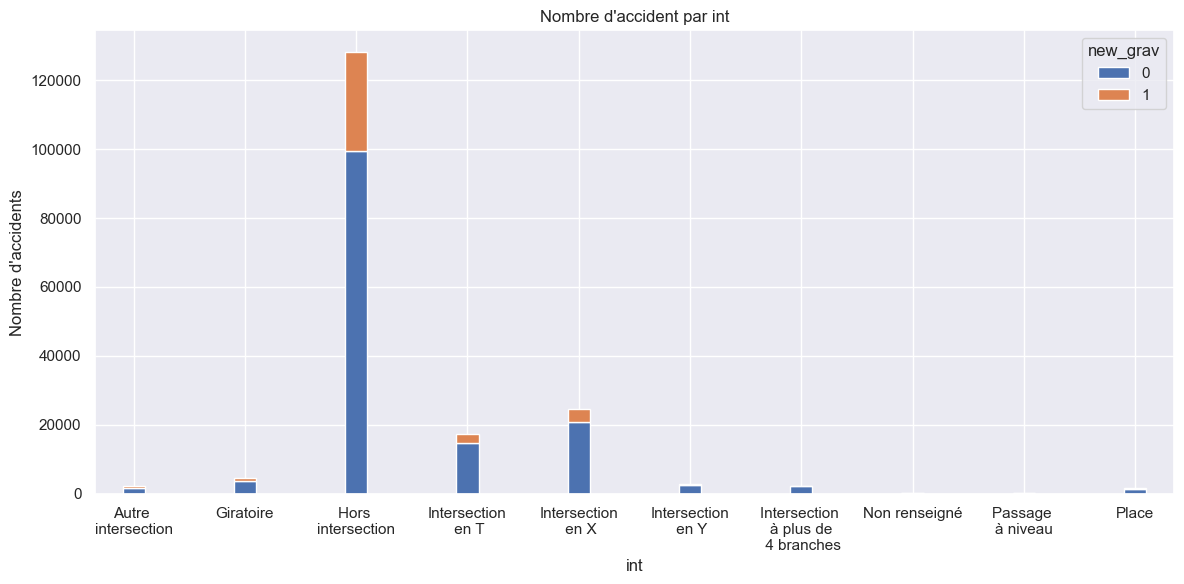

In [108]:
graph_together("int",12,6,0.2,0,acci=acci_df)

Les accidents mortels se produisent souvent dans les zones situées en dehors des intersections, ce qui peut être fortement justifié par la vitesse élevée, car aux intersections, les utilisateurs de véhicules sont toujours contraints de réduire leur vitesse au minimum.

### Conditions atmosphériques ATM

In [109]:
val_aber("atm")

il n'y a pas de valeurs aberrantes dans la colonne ATM


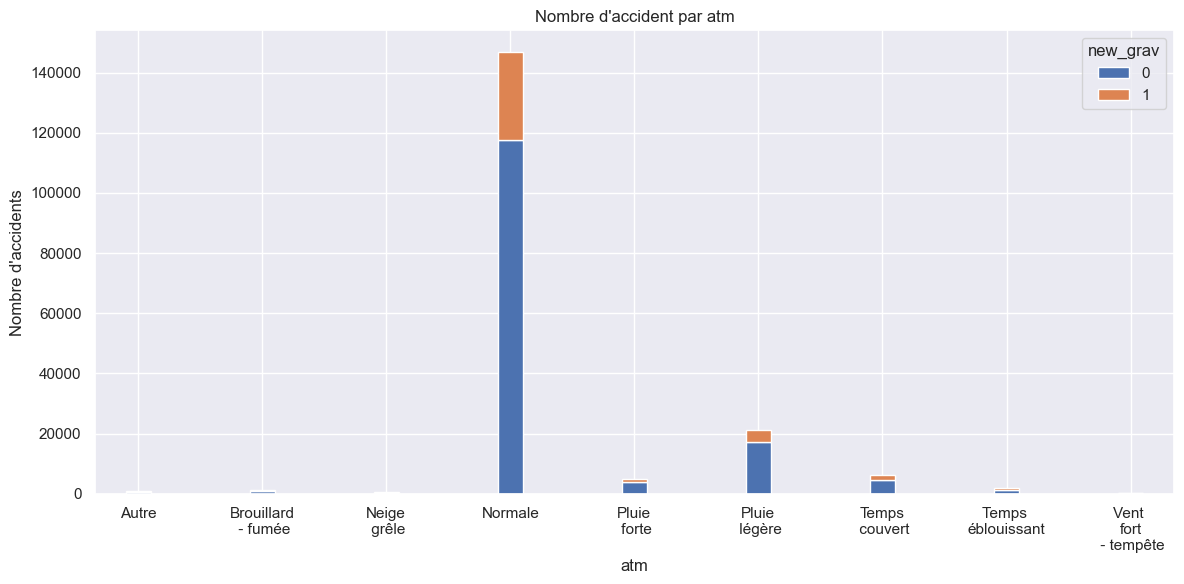

In [110]:
graph_together("atm",12,6,0.2,0,acci=acci_df)

Les accidents mortels se produisent le plus souvent pendant les conditions atmosphériques normales , ce qui s'explique par :

-Visibilité accrue : Les conditions atmosphériques normales, telles que le ciel dégagé et le temps sec, offrent une meilleure visibilité aux conducteurs, ce qui peut entraîner une augmentation de la vitesse et un faux sentiment de sécurité. Cela peut conduire à des accidents en raison d'un temps de réaction réduit.


-Volume de circulation élevé : Les conditions atmosphériques normales peuvent souvent être accompagnées d'un volume de circulation plus élevé, surtout pendant les heures de pointe. Cela augmente le nombre de véhicules sur la route, ce qui peut entraîner plus d'accidents.


-Conscience réduite : Les conditions atmosphériques normales peuvent entraîner une réduction de la conscience des risques de conduite, conduisant à une conduite distraite ou à d'autres comportements imprudents.

#### Type de colision COL

In [111]:
val_aber("col")

il n'y a pas de valeurs aberrantes dans la colonne COL


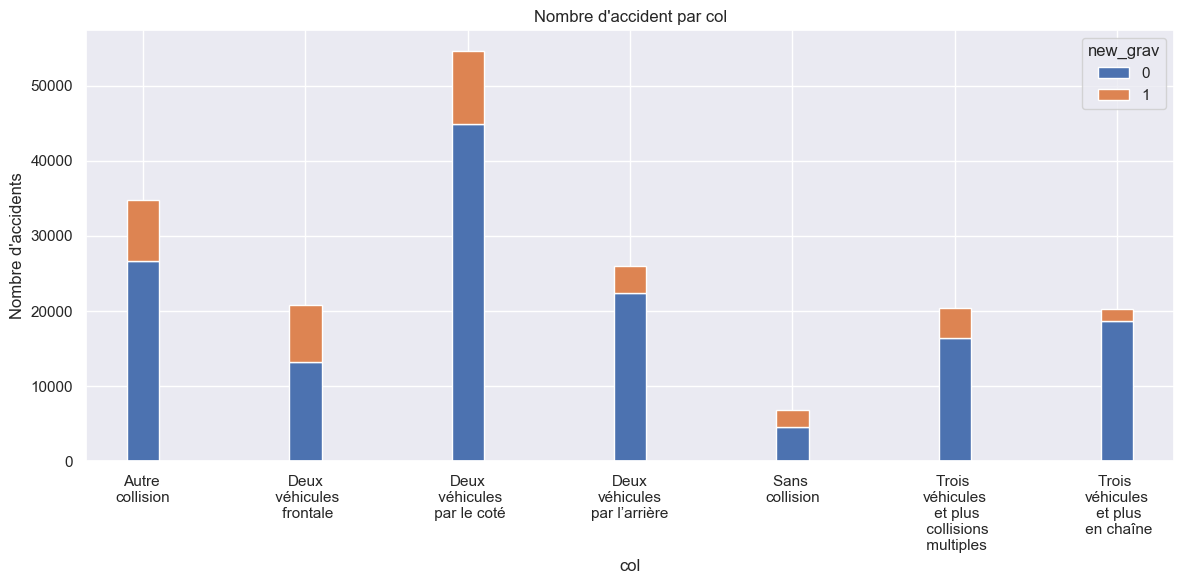

In [112]:
graph_together("col",12,6,0.2,0,acci=acci_df)

Les accidents qui se produisent entre deux véhicules dont le point d'impact est le côté sont plus nombreux et tendent à être mortels. Le type de collision joue un rôle très important dans la prédiction de la gravité des accidents. 

#### Departement DEP

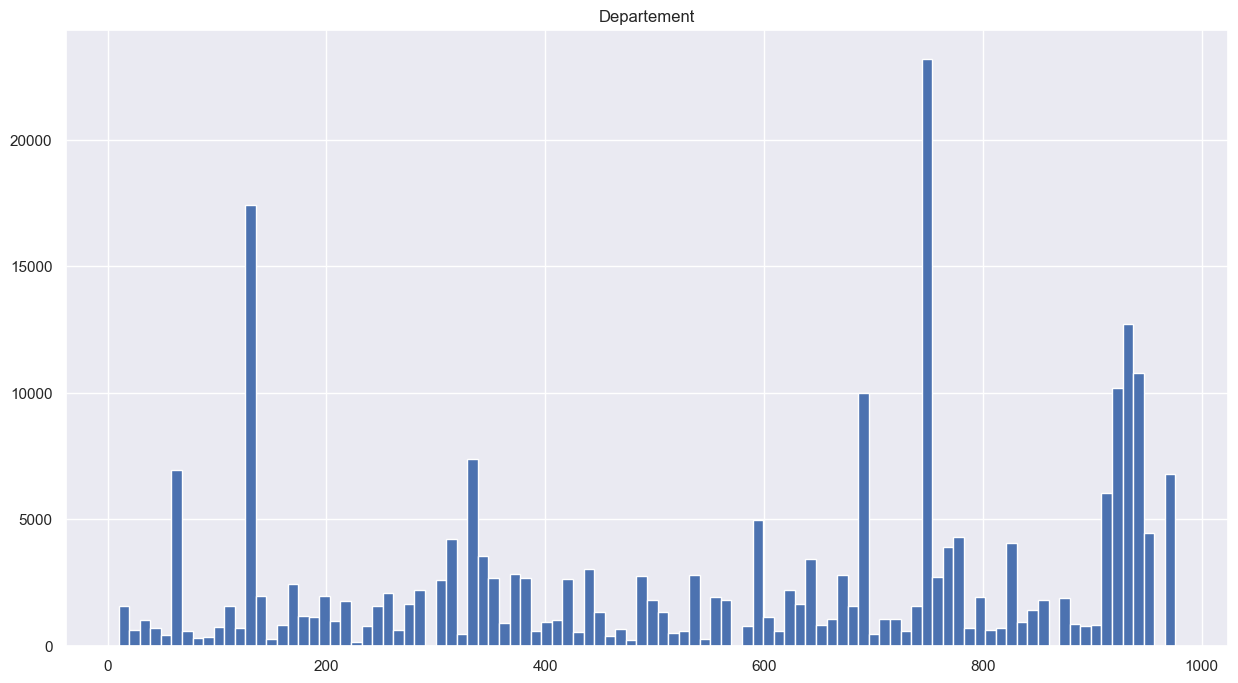

In [113]:
plt.figure(figsize=(15,8))
plt.hist(acci_df['dep'], bins=100)
plt.title('Departement')
plt.show()

On constate que le departement ayant le code environ 75 a plus d'accidents que les autres departement de la France métropolitaine

104

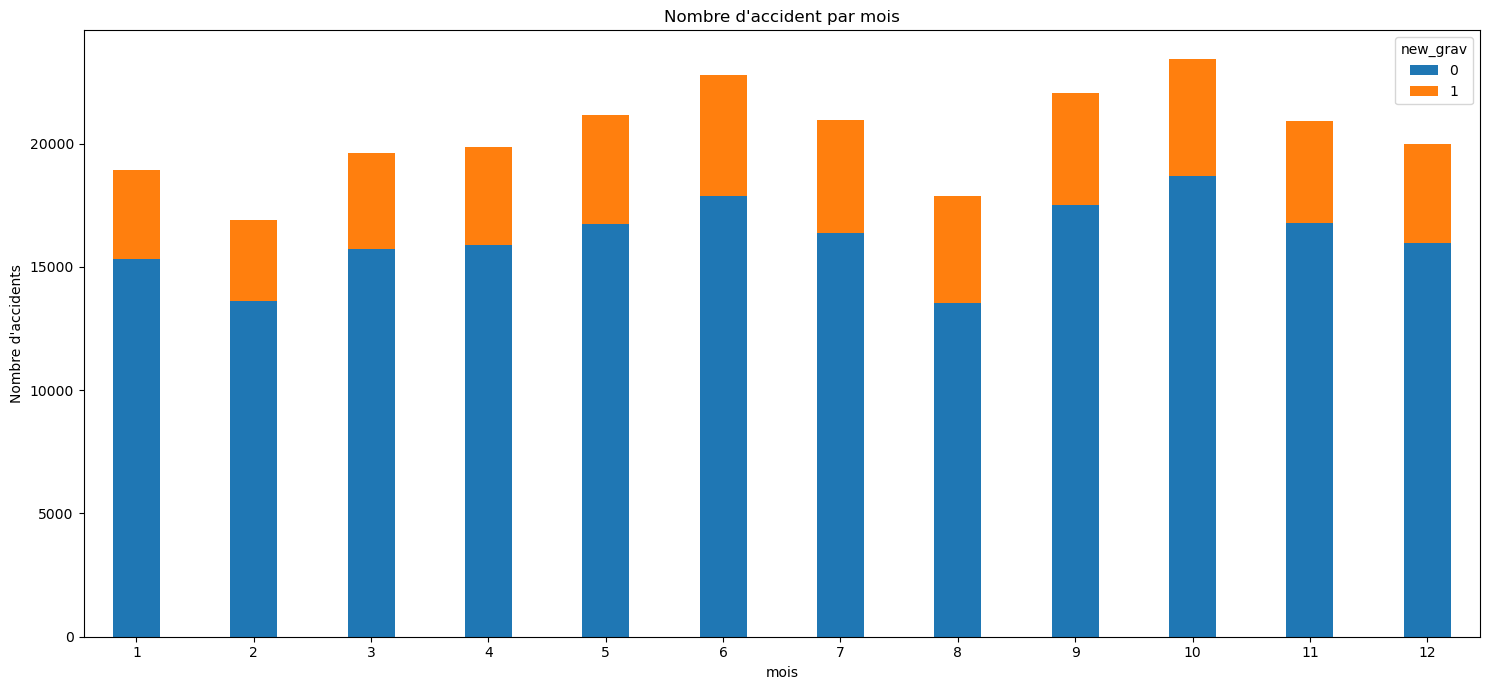

In [53]:
acci = accidents.copy()
var="mois"
mois_counts = acci["mois"].value_counts()
grouped_counts = acci.groupby(["mois", 'new_grav']).size().unstack()
fig, ax = plt.subplots(figsize=(15, 7))
grouped_counts.plot(kind='bar', stacked=True, width=0.4, ax=ax)
plt.xlabel(var)
plt.ylabel("Nombre d'accidents")
plt.title(f"Nombre d'accident par mois")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.tight_layout()
plt.show()

### 5- Gestion des valeurs manquantes


On regarde combien de lignes présentent au moins une valeur manquante :

In [114]:
print(np.count_nonzero(accidents.isnull().sum(axis=1).values), '/', accidents.shape[0])

183912 / 183949


Comme toutes les lignes comportent  au moins une valeur manquante, on cherche à déterminer quelles sont les variables qui en présentent le plus :

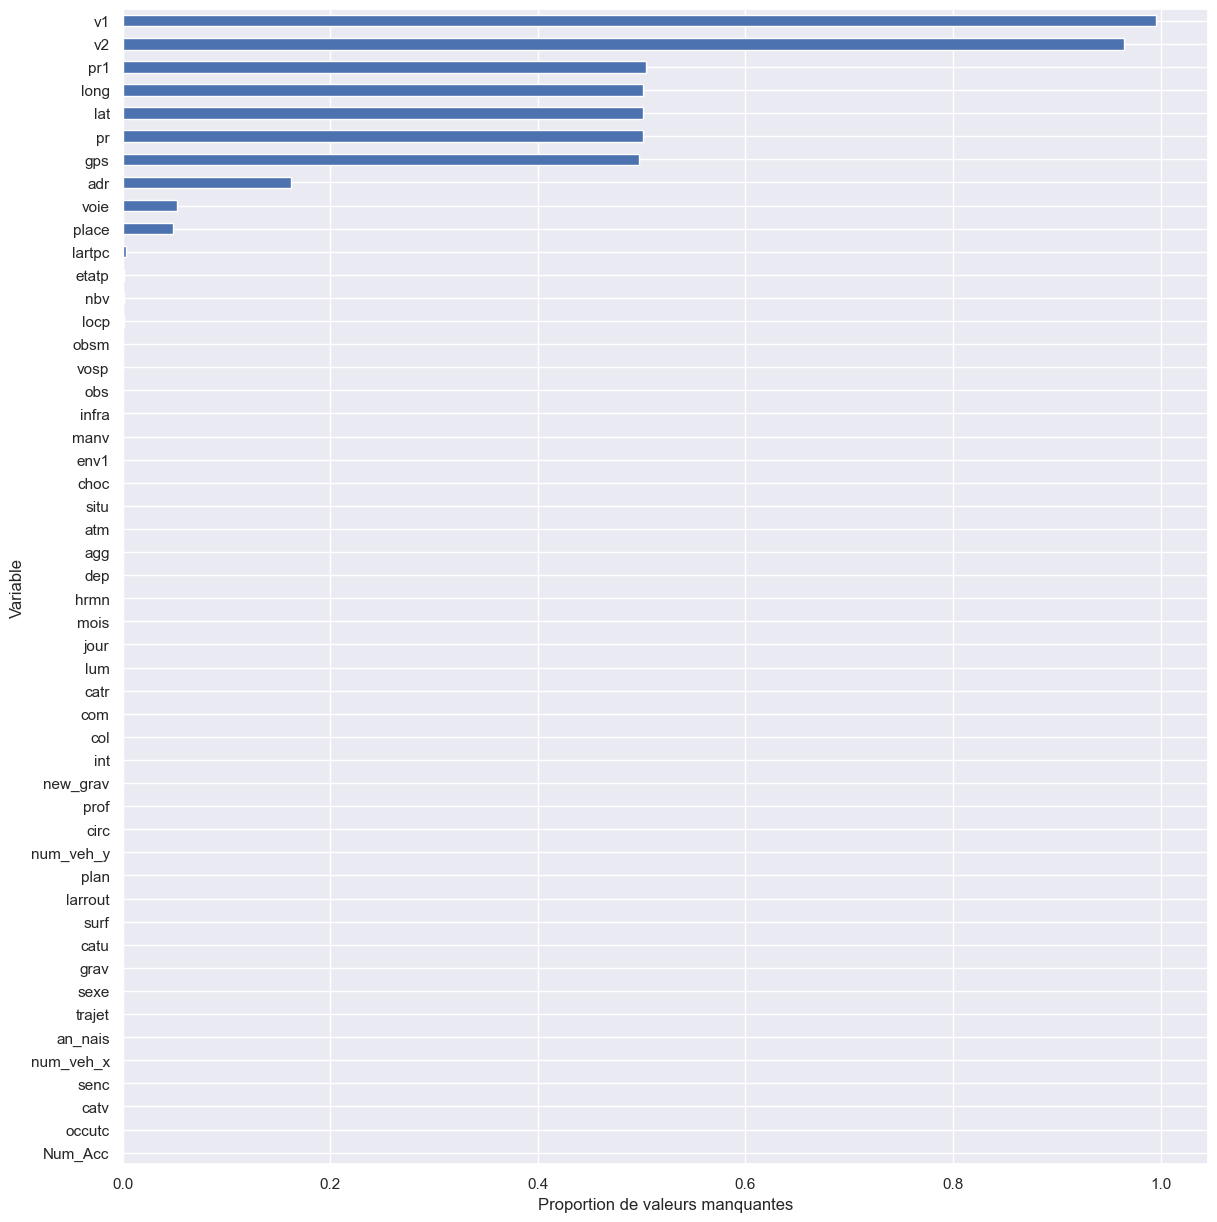

In [115]:
# pour ces variables, 0 indique également une valeur manquante
sns.set_style('darkgrid')
nan_col = accidents.isna().sum().sort_values(ascending=True)/accidents.shape[0]
nan_col.plot.barh(figsize=(14,15))
plt.xlabel('Proportion de valeurs manquantes')
plt.ylabel('Variable')
plt.show();


In [116]:
def valeur_manquante(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total des valeurs Null', 'Pourcentage des valeurs Null'])

valeur_manquante(accidents)

Total des valeurs Null  Pourcentage des valeurs Null
v1                         183179                     99.581406
v2                         177509                     96.499030
pr1                         92696                     50.392228
long                        92274                     50.162817
lat                         92274                     50.162817
pr                          92218                     50.132374
gps                         91459                     49.719759
adr                         29792                     16.195793
voie                         9571                      5.203073
place                        8826                      4.798069
lartpc                        500                      0.271814
etatp                         166                      0.090242
nbv                           137                      0.074477
locp                          112                      0.060886
obsm                           86                      0.046752
vosp                           50                      0.027181
obs                            48                      0.026094
infra                          41                      0.022289
manv                           33                      0.017940
env1                           19                      0.010329
choc                           15                      0.008154
situ                           12                      0.006524
atm                            11                      0.005980
sexe                            0                      0.000000
trajet                          0                      0.000000
catv                            0                      0.000000
num_veh_y                       0                      0.000000
occutc                          0                      0.000000
an_nais                         0                      0.000000
grav                            0                      0.000000
num_veh_x                       0                      0.000000
senc                            0                      0.000000
Num_Acc                         0                      0.000000
plan                            0                      0.000000
catu                            0                      0.000000
surf                            0                      0.000000
larrout                         0                      0.000000
mois                            0                      0.000000
prof                            0                      0.000000
circ                            0                      0.000000
catr                            0                      0.000000
dep                             0                      0.000000
com                             0                      0.000000
col                             0                      0.000000
int                             0                      0.000000
agg                             0                      0.000000
lum                             0                      0.000000
hrmn                            0                      0.000000
jour                            0                      0.000000
new_grav                        0                      0.000000

On supprime toutes variable présentant plus de valeurs manquantes.

In [117]:
accidents = accidents.drop(['v2', 'v1', 'long', 'lat', 'pr1', 'pr', 'gps','adr','num_veh_x','num_veh_y'], axis = 1)
valeur_manquante(accidents)

Total des valeurs Null  Pourcentage des valeurs Null
voie                        9571                      5.203073
place                       8826                      4.798069
lartpc                       500                      0.271814
etatp                        166                      0.090242
nbv                          137                      0.074477
locp                         112                      0.060886
obsm                          86                      0.046752
vosp                          50                      0.027181
obs                           48                      0.026094
infra                         41                      0.022289
manv                          33                      0.017940
env1                          19                      0.010329
choc                          15                      0.008154
situ                          12                      0.006524
atm                           11                      0.005980
an_nais                        0                      0.000000
senc                           0                      0.000000
catv                           0                      0.000000
trajet                         0                      0.000000
sexe                           0                      0.000000
occutc                         0                      0.000000
grav                           0                      0.000000
catu                           0                      0.000000
Num_Acc                        0                      0.000000
surf                           0                      0.000000
mois                           0                      0.000000
larrout                        0                      0.000000
plan                           0                      0.000000
prof                           0                      0.000000
circ                           0                      0.000000
catr                           0                      0.000000
dep                            0                      0.000000
com                            0                      0.000000
col                            0                      0.000000
int                            0                      0.000000
agg                            0                      0.000000
lum                            0                      0.000000
hrmn                           0                      0.000000
jour                           0                      0.000000
new_grav                       0                      0.000000

#### Le code ci-dessous affiche un Dataframe qui contient des valeurs uniques de chaque variable et les valeurs des instructions.

In [118]:
list_cat=col_dictionnaire(accidents, var_dic)
category_df = pd.DataFrame(columns=['categorie', 'unique_values',"real_values","val_a_suppr"])
for col in list_cat:
    unique_vals = ','.join(map(str, sorted([x for x in list(accidents[col].unique()) if not isinstance(x, pd._libs.missing.NAType)])))
    dic_keys=','.join(map(str, var_dic[col].keys()))
    val_a_supp=','.join(map(str,[x for x in list(accidents[col].unique()) if x not in var_dic[col].keys()]))
    category_df  = category_df.append({'categorie': col, 'unique_values': unique_vals,"real_values":dic_keys,"val_a_suppr":val_a_supp}, ignore_index=True)
pd.options.display.max_colwidth = 30
category_df

categorie                  unique_values                    real_values  \
0        lum                      1,2,3,4,5                      1,2,3,4,5   
1        agg                            1,2                            1,2   
2        int            0,1,2,3,4,5,6,7,8,9            0,1,2,3,4,5,6,7,8,9   
3        atm              1,2,3,4,5,6,7,8,9              1,2,3,4,5,6,7,8,9   
4        col                  1,2,3,4,5,6,7                  1,2,3,4,5,6,7   
5       catr                  1,2,3,4,5,6,9                1,2,3,4,5,6,7,9   
6       circ                        1,2,3,4                        1,2,3,4   
7       vosp                        0,1,2,3                        0,1,2,3   
8       prof                        1,2,3,4                        1,2,3,4   
9       plan                        1,2,3,4                        1,2,3,4   
10      surf              1,2,3,4,5,6,7,8,9              1,2,3,4,5,6,7,8,9   
11     infra                0,1,2,3,4,5,6,7            0,1,2,3,4,5,6,7,8,9   
12      situ                    0,1,2,3,4,5                0,1,2,3,4,5,6,7   
13      catu                          1,2,3                          1,2,3   
14      grav                        1,2,3,4                        1,2,3,4   
15      sexe                            1,2                            1,2   
16    trajet                    0,1,2,3,4,5                  0,1,2,3,4,5,6   
17      locp              0,1,2,3,4,5,6,7,8            0,1,2,3,4,5,6,7,8,9   
18     etatp                        0,1,2,3                          1,2,3   
19      senc                          0,1,2                          0,1,2   
20      catv  1,2,3,7,10,13,14,15,16,17,...  0,1,2,3,5,7,8,10,11,12,13,...   
21    occutc  0,1,2,3,4,5,6,7,8,9,10,11,...           1,2,3,4,5,6,7,8,9,10   
22       obs  0,1,2,3,4,5,6,7,8,9,10,11,...  0,1,2,3,4,5,6,7,8,9,10,11,...   
23      obsm                  0,1,2,4,5,6,9                  0,1,2,4,5,6,9   
24      choc            0,1,2,3,4,5,6,7,8,9            0,1,2,3,4,5,6,7,8,9   
25      manv  0,1,2,3,4,5,6,7,8,9,10,11,...  0,1,2,3,4,5,6,7,8,9,10,11,...   
26  new_grav                            0,1                            0,1   

                      val_a_suppr  
0                                  
1                                  
2                                  
3                            <NA>  
4                                  
5                                  
6                                  
7                            <NA>  
8                                  
9                                  
10                                 
11                           <NA>  
12                           <NA>  
13                                 
14                                 
15                                 
16                                 
17                           <NA>  
18                         0,<NA>  
19                                 
20                                 
21  0,35,22,50,29,24,18,17,20,...  
22                           <NA>  
23                           <NA>  
24                           <NA>  
25                           <NA>  
26

In [119]:
def list_a_suppr(col,accidents=accidents):
    unique_vals = ','.join(map(str, sorted([x for x in list(accidents[col].unique()) if not isinstance(x, pd._libs.missing.NAType)])))
    dic_keys=','.join(map(str, var_dic[col].keys()))
    val_a_supp=','.join(map(str,[x for x in list(accidents[col].unique()) if x not in var_dic[col].keys()]))
    val_a_supp=val_a_supp.split(",")
    val_int=[item for item in val_a_supp if item != '<NA>']
    val=[int(item) for item in val_int if item != '']
    return(val)

#### Analyse de la variable occutc

In [120]:
occutc_pct = acci_df['occutc'].value_counts(normalize=True) * 100
print(occutc_pct)

0      98.996556
1       0.422567
2       0.101449
10      0.056451
3       0.052361
         ...    
59      0.000818
125     0.000818
19      0.000818
132     0.000818
110     0.000818
Name: occutc, Length: 64, dtype: Float64


##### La colonne occutc qui rapporte le nombre d'occupants des transports en commun impliqués dans des accidents affiche systématiquement une valeur de zéro dans plus de 98 % des cas, il est peu probable qu'elle fournisse des informations utiles pour Notre analyse. Dans de tels cas, il peut être raisonnable de supprimer cette colonne de notre analyse car elle ne contient pas de données significatives qui pourraient contribuer à la solution de notre problème.

In [121]:
accidents = accidents.drop('occutc', axis = 1)

#### Analyse de la variable etatp

In [122]:
etatp_pct = accidents['etatp'].value_counts(normalize=True) * 100
print(etatp_pct)

0    95.448436
1     3.413809
2     0.906504
3     0.231251
Name: etatp, dtype: Float64


#### La colonne etatp qui permet de préciser si le piéton accidenté était seul ou non affiche systématiquement une valeur de zéro dans plus de 95% des cas, il est peu probable qu'elle fournisse des informations utiles pour Notre analyse. Dans de tels cas, il peut être raisonnable de supprimer cette colonne de notre analyse car elle ne contient pas de données significatives qui pourraient contribuer à la solution de notre problème.

In [123]:
accidents = accidents.drop('etatp', axis = 1)

In [124]:
accidents

Num_Acc  mois  jour      hrmn  lum  agg  int  atm  col  com  ...  \
0          1001    10     6  12:30:00    1    2    6    3    3   93  ...   
1          1001    10     6  12:30:00    1    2    6    3    3   93  ...   
2          1001    10     6  12:30:00    1    2    6    3    3   93  ...   
3          1001    10     6  12:30:00    1    2    6    3    3   93  ...   
4          1002    10    12  11:45:00    1    1    1    3    1  142  ...   
...         ...   ...   ...       ...  ...  ...  ...  ...  ...  ...  ...   
244441    59850    12    24  17:00:00    1    2    1    1    7   16  ...   
244442    59851    12    24  18:50:00    2    2    1    1    7   16  ...   
244443    59852    12    27  01:40:00    3    1    1    1    7   16  ...   
244444    59853    12    28  11:00:00    1    1    1    1    7   16  ...   
244445    59853    12    28  11:00:00    1    1    1    1    7   16  ...   

        trajet  locp  an_nais  senc  catv  obs  obsm  choc  manv  new_grav  
0            4     0   1978.0     0     7    0     2     1     9         0  
1            4     0   1978.0     0     2    0     2     5     2         0  
2            1     0   1996.0     0     7    0     2     1     9         0  
3            1     0   1996.0     0     2    0     2     5     2         0  
4            5     0   1971.0     0     7    0     2     3    13         1  
...        ...   ...      ...   ...   ...  ...   ...   ...   ...       ...  
244441       0     0   2012.0     0     7    0     0     9    14         0  
244442       0     0   1961.0     0     2    0     0     0    14         0  
244443       0     0   1963.0     0    33    0     0     0    14         0  
244444       0     0   1990.0     0     7    0     0     9    13         0  
244445       0     0   1991.0     0     7    0     0     9    13         0  

[183949 rows x 38 columns]

#### Le jeu de données est encore assez volumineux pour trainer nos modèles,

On ajoute à une variable `num_vict` qui indique si au moins l'un des usagers impliqué dans l'accident est Tué / Blessé hospitalisé.

In [125]:
vict_id = accidents[accidents.new_grav == 1].Num_Acc.tolist()
accidents['num_vict'] = accidents.Num_Acc.isin(vict_id)

On va créer une fonction pour générer les couleurs des graphes selon le nombre de modalités

In [126]:
def rand_color(n):
    colors = []
    for i in range(n):
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        while color == (255, 255, 255):  # exclude white color
            color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        colors.append('#%02x%02x%02x' % color)
    return colors

## 5: Statistiques par Departement

Dans cette sous-partie, nous allons chercher à représenter sur une carte le nombre d'accidents ayant eu lieu dans chaque departement de France, on se restreindra à la France métropolitaine :
##### Nous utilisons les fonctions et méthodes de GeoPandas pour effectuer des opérations spatiales, manipuler les attributs des formes, visualiser les données sur une carte.

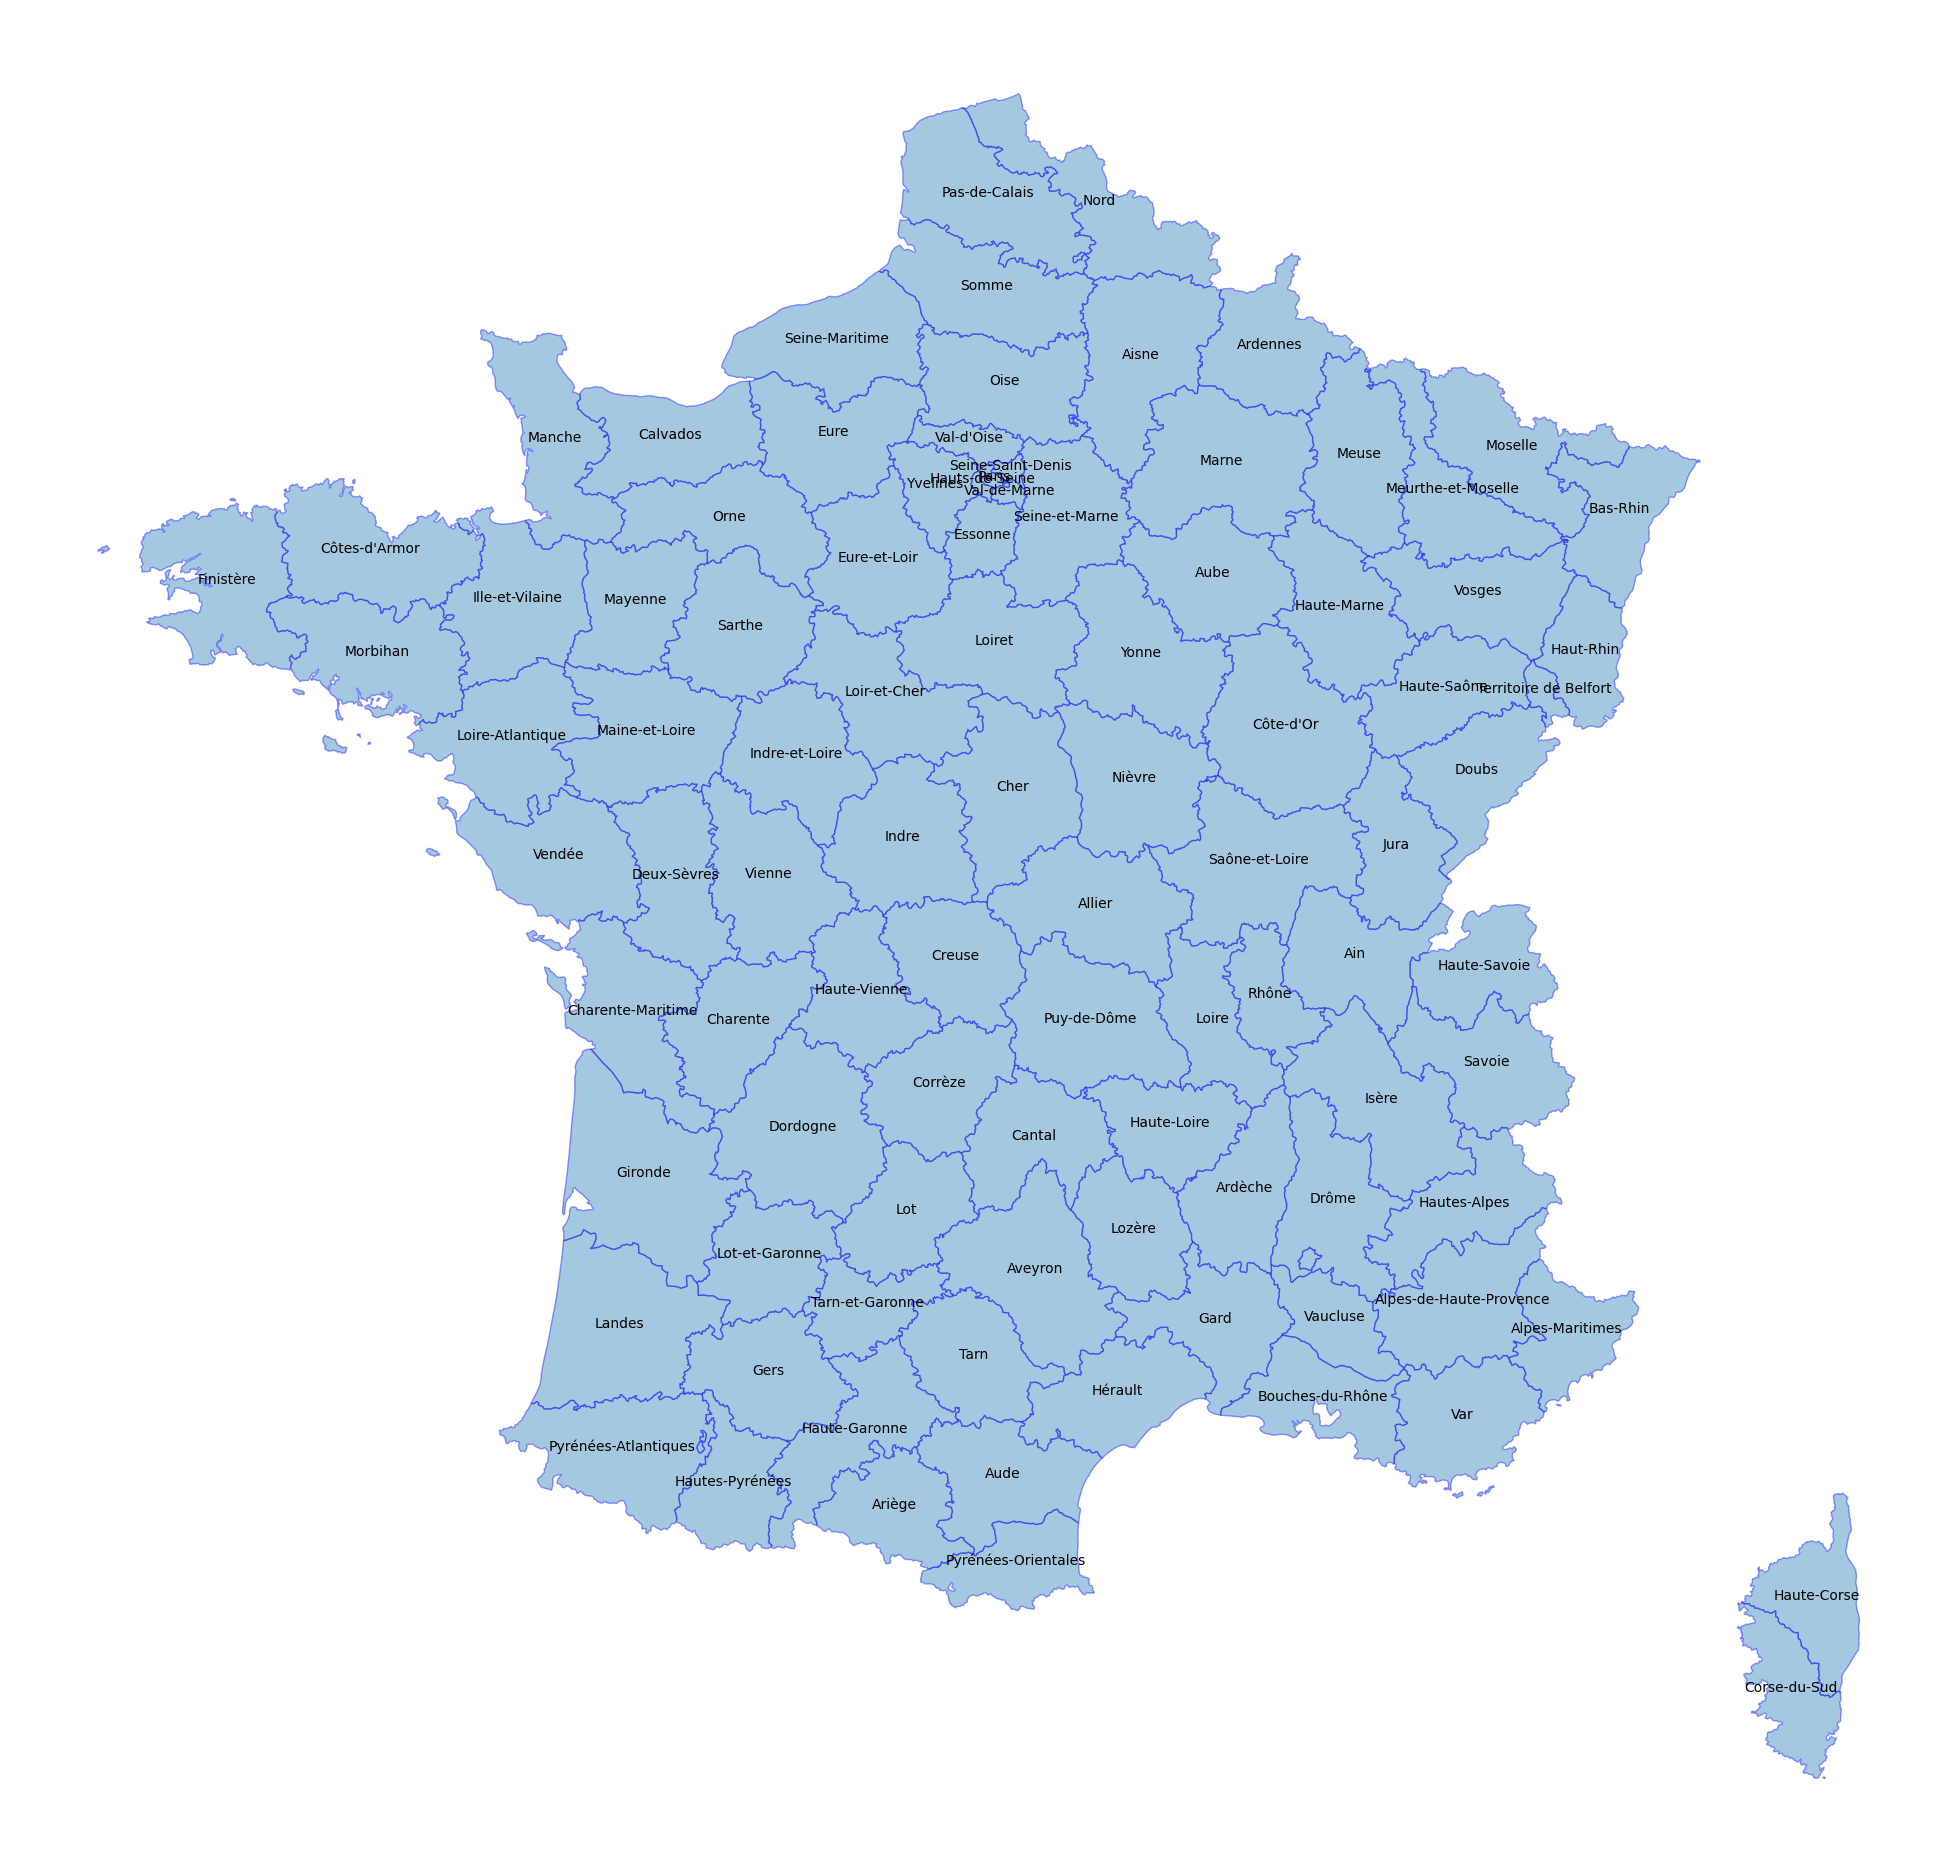

In [57]:
departements = gpd.read_file('Departement/departement.geojson')
fig, ax = plt.subplots(figsize=(25, 25))
departements.plot(ax = ax, alpha=0.4, edgecolor='blue')

# On ajoute le nom du departements sur la carte
for idx, row in departements.iterrows():
    ax.annotate(text=row['nom'], xy=row['geometry'].centroid.coords[0], ha='center', color='black')

ax.set_axis_off()
plt.show()

Nous nous concentrerons sur les accidents en France métropolitaine, donc nous omettons toutes les valeurs qui correspondent aux  pays et territoires d'outre-mer (PTOM) dans la colonne dep.

In [58]:
# il faut d'abord convertir la colonne en str pour faire du slicing
accidents["dep"]=accidents["dep"].astype(str)

In [59]:
accidents["dep"].unique()

array(['220', '290', '560', '140', '500', '940', '10', '610', '440',
       '490', '530', '720', '850', '330', '40', '240', '400', '470',
       '640', '860', '160', '170', '790', '870', '190', '230', '310',
       '90', '20', '120', '320', '650', '460', '810', '690', '820', '70',
       '260', '380', '420', '730', '740', '630', '30', '150', '430',
       '570', '540', '550', '880', '670', '680', '510', '80', '100',
       '520', '210', '580', '710', '890', '250', '390', '700', '900',
       '130', '50', '60', '830', '840', '340', '110', '300', '480', '660',
       '201', '202', '780', '910', '950', '770', '450', '180', '280',
       '360', '370', '410', '600', '620', '800', '270', '760', '590',
       '350', '920', '930', '750', '972', '971', '973', '974', '976'],
      dtype=object)

In [60]:
#On va supprimer les valeurs qui sont liées au PTOM
metropole_code = ['972', '971','973','974','976','20','201','200','202']

# Supprimer les departements PTROM
accidents= accidents[~accidents['dep'].isin(metropole_code)]

In [61]:
#la colonne des departement contient les code des departements avec 0 a la fin, on doit le supprimer
accidents["dep"]=accidents["dep"].str[:2]

In [62]:
accidents["dep"].unique()

array(['22', '29', '56', '14', '50', '94', '10', '61', '44', '49', '53',
       '72', '85', '33', '40', '24', '47', '64', '86', '16', '17', '79',
       '87', '19', '23', '31', '90', '12', '32', '65', '46', '81', '69',
       '82', '70', '26', '38', '42', '73', '74', '63', '30', '15', '43',
       '57', '54', '55', '88', '67', '68', '51', '80', '52', '21', '58',
       '71', '89', '25', '39', '13', '60', '83', '84', '34', '11', '48',
       '66', '78', '91', '95', '77', '45', '18', '28', '36', '37', '41',
       '62', '27', '76', '59', '35', '92', '93', '75'], dtype=object)

On ajoute une colonne pour les departements

In [63]:
dep = pd.read_csv('Departement/departements_france.csv',sep=",").set_index('code_dep')
dep.head()

nom_dep  code_reg                     nom_reg
code_dep                                                               
1                             Ain        84        Auvergne-Rhône-Alpes
2                           Aisne        32             Hauts-de-France
3                          Allier        84        Auvergne-Rhône-Alpes
4         Alpes-de-Haute-Provence        93  Provence-Alpes-Côte d'Azur
5                    Hautes-Alpes        93  Provence-Alpes-Côte d'Azur

In [64]:
def map_department(code_dep):
    if pd.isna(code_dep):
        return code_dep  # return NaN if code_dep is NaN
    else:
        return dep.loc[int(code_dep), 'nom_dep']

# Apply the mapping function to the "dep" column
accidents['departement'] = accidents['dep'].apply(map_department)

In [65]:
accidents['departement'] = accidents.dep.apply(lambda code_dep: dep.loc[int(code_dep), 'nom_dep'])

In [66]:
accidents['departement'].unique()

array(["Côtes-d'Armor", 'Finistère', 'Morbihan', 'Calvados', 'Manche',
       'Val-de-Marne', 'Aube', 'Orne', 'Loire-Atlantique',
       'Maine-et-Loire', 'Mayenne', 'Sarthe', 'Vendée', 'Gironde',
       'Landes', 'Dordogne', 'Lot-et-Garonne', 'Pyrénées-Atlantiques',
       'Vienne', 'Charente', 'Charente-Maritime', 'Deux-Sèvres',
       'Haute-Vienne', 'Corrèze', 'Creuse', 'Haute-Garonne',
       'Territoire de Belfort', 'Aveyron', 'Gers', 'Hautes-Pyrénées',
       'Lot', 'Tarn', 'Rhône', 'Tarn-et-Garonne', 'Haute-Saône', 'Drôme',
       'Isère', 'Loire', 'Savoie', 'Haute-Savoie', 'Puy-de-Dôme', 'Gard',
       'Cantal', 'Haute-Loire', 'Moselle', 'Meurthe-et-Moselle', 'Meuse',
       'Vosges', 'Bas-Rhin', 'Haut-Rhin', 'Marne', 'Somme', 'Haute-Marne',
       "Côte-d'Or", 'Nièvre', 'Saône-et-Loire', 'Yonne', 'Doubs', 'Jura',
       'Bouches-du-Rhône', 'Oise', 'Var', 'Vaucluse', 'Hérault', 'Aude',
       'Lozère', 'Pyrénées-Orientales', 'Yvelines', 'Essonne',
       "Val-d'Oise", 'Seine-e

In [73]:
import plotly.express as px
fig = px.treemap(accidents, path=['departement'], title='Accidents par Department')
fig.show()

Il pourrait y avoir de nombreuses raisons pour lesquelles Paris et Bouches-du-Rhône ont plus d'accidents en France. Voici quelques facteurs possibles :

Densité de population :
Paris et Bouches-du-Rhône ont toutes deux une forte densité de population, ce qui signifie qu'il y a plus de personnes et de véhicules dans une zone plus petite. Cela peut augmenter la probabilité d'accidents.

Destinations touristiques : 
Paris est une destination touristique majeure, avec des millions de visiteurs chaque année. Les touristes peuvent ne pas être familiers avec les routes locales et les règles de circulation, ce qui peut augmenter le risque d'accidents.

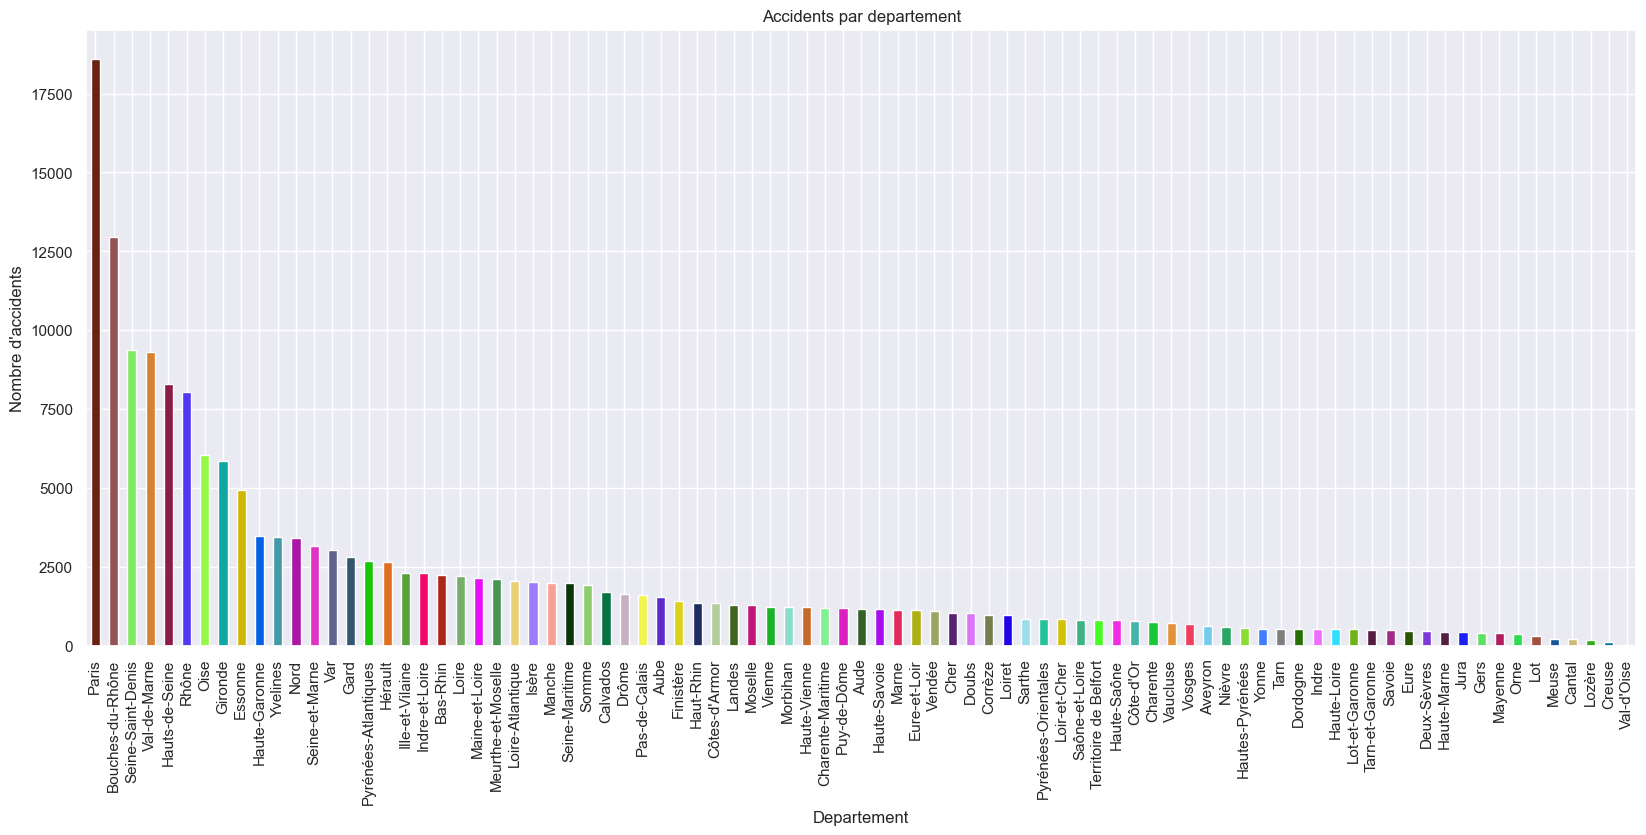

In [138]:
counts = accidents["departement"].value_counts()
colors = rand_color(len(accidents["departement"].unique()))
fig, ax = plt.subplots(figsize=(20, 8))
counts.plot(kind="bar", ax=ax, color=colors)
ax.set_title("Accidents par departement")
ax.set_xlabel("Departement")
ax.set_ylabel("Nombre d'accidents")
plt.show()

In [139]:
departements = departements.rename(columns={"nom": "departement"})

On remarque l'absence des départements ["Allier", "Ain", "Ardèche", "Nord"] dans le jeu de données accidents,dans le code ci-dessous,  et par souci d'esthétique, on va ajouter quatre lignes pour les additionner et plus tard, on fixe le valeur de la survenance d'un accident dans ces zones à zéro.

In [140]:
new_departements = ["Allier", "Ain", "Ardèche", "Nord"]
# Définissez toutes les autres colonnes sur NaN pour ces nouvelles valeurs
new_data = pd.DataFrame({"departement": new_departements})
new_data = new_data.assign(**{col: float('nan') for col in accidents.columns if col != "departement"})

# Ajouter les nouvelles données au DataFrame existant
accidents = accidents.append(new_data, ignore_index=True)

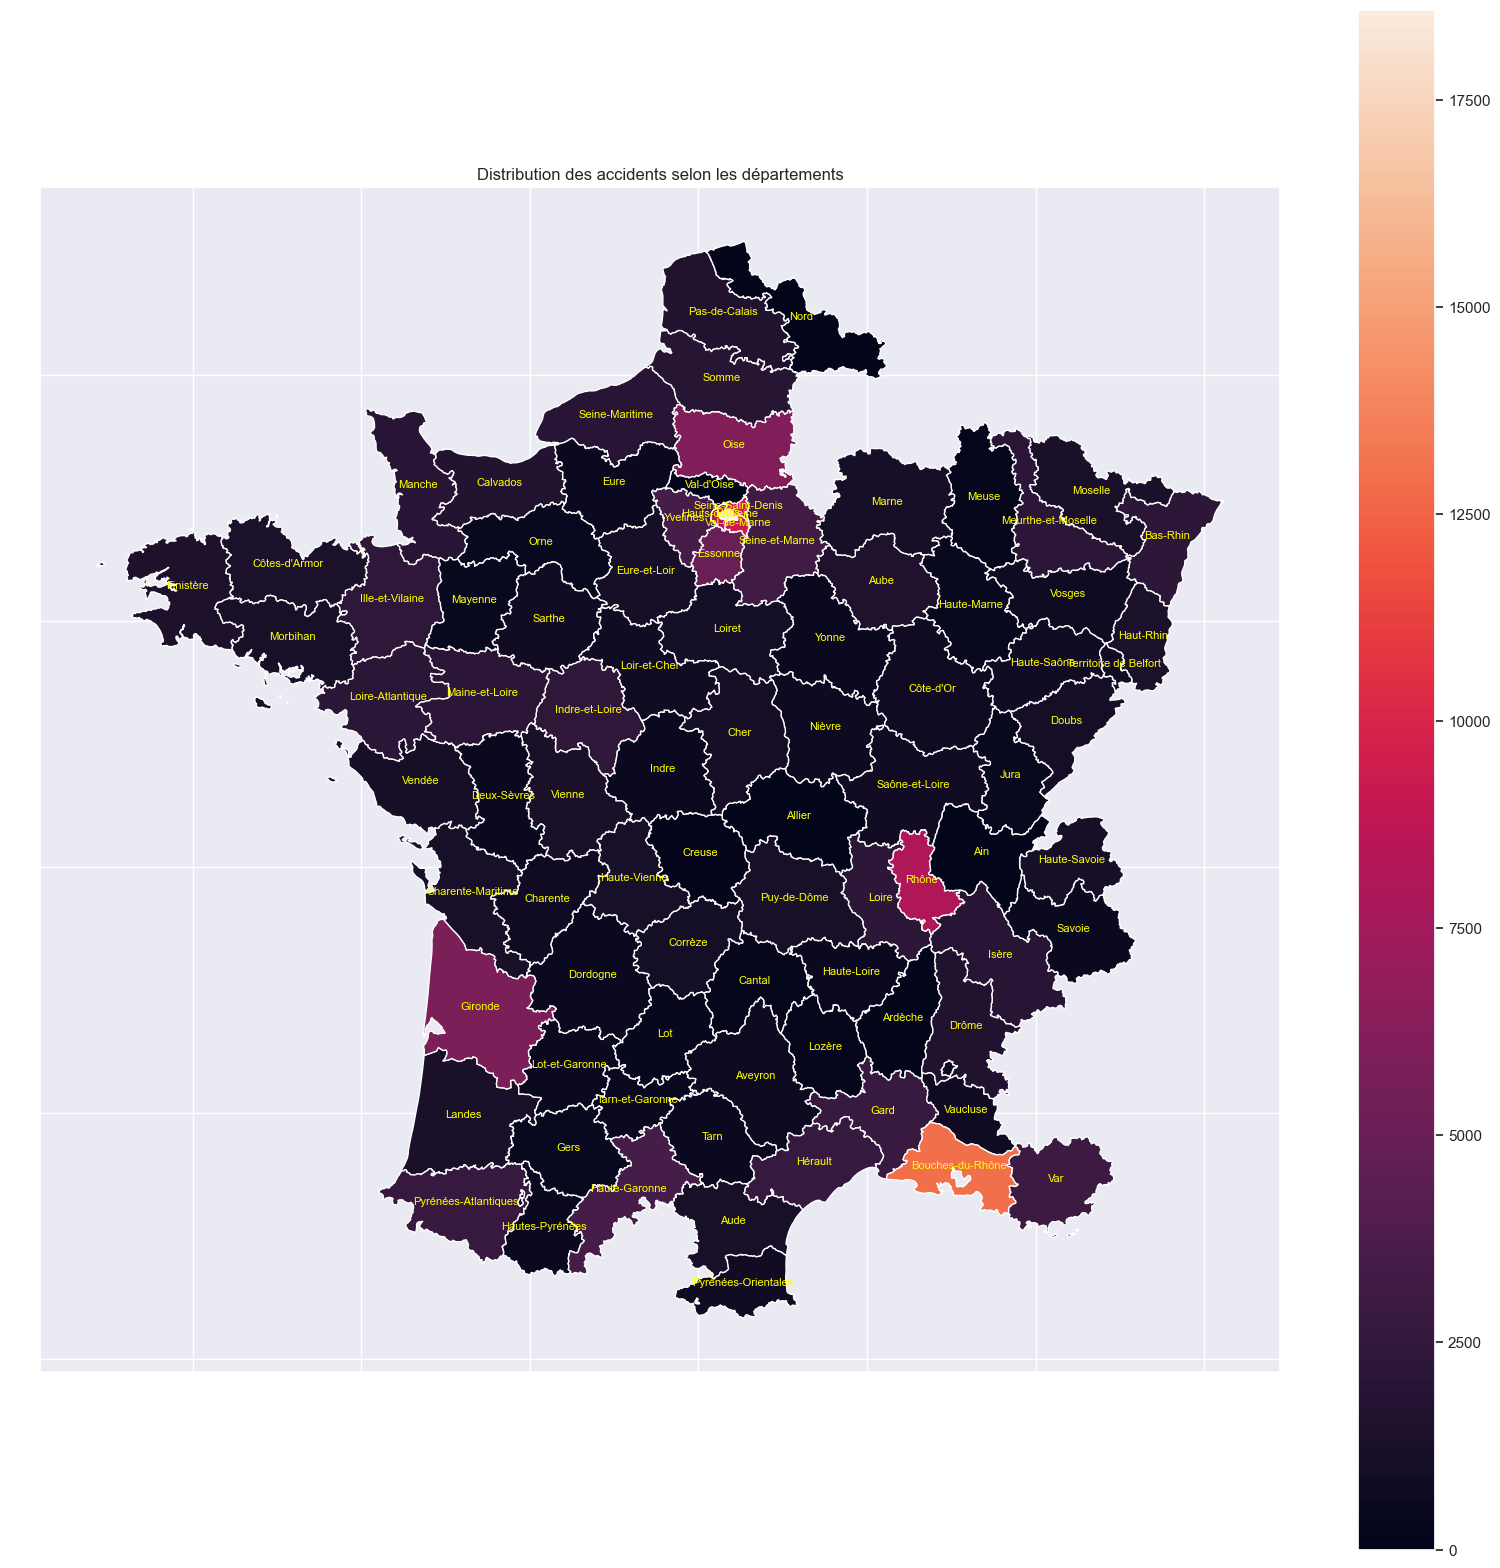

In [141]:
# Group the accidents DataFrame by the "departement" column and count the number of accidents
num_accidents = accidents.groupby("departement").size().reset_index(name="num_accidents")

# Liste des départements pour mettre num_accidents à zéro
dept_list = ["Allier", "Ain", "Ardèche", "Nord"]

# Mettre num_accidents à zéro pour les départements sélectionnés
num_accidents.loc[num_accidents['departement'].isin(dept_list), 'num_accidents'] = 0

# Fusionner les deux DataFrames en fonction de la colonne "departement"
merged = pd.merge(departements, num_accidents, on="departement")

# Créez un nouveau tracé et définissez le rapport d'aspect sur "égal"
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')

# Tracez le GeoDataFrame fusionné et ajoutez des noms de département à chaque polygone
for idx, row in merged.iterrows():
    ax.annotate(text=row['departement'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8, color='yellow')
merged.plot(column="num_accidents", ax=ax, legend=True, facecolor='#0077be')

# Changer la couleur des étiquettes de degré
ax.tick_params(axis='both', colors='white')
plt.title("Distribution des accidents selon les départements")
# Display the plot
plt.show()

## Distributions des accidents dans les departements suivant les nouvelles modalites

In [142]:
accidents

Num_Acc  mois  jour      hrmn   lum   agg   int   atm   col    com  \
0        1001.0  10.0   6.0  12:30:00     1     2     6     3     3   93.0   
1        1001.0  10.0   6.0  12:30:00     1     2     6     3     3   93.0   
2        1001.0  10.0   6.0  12:30:00     1     2     6     3     3   93.0   
3        1001.0  10.0   6.0  12:30:00     1     2     6     3     3   93.0   
4        1002.0  10.0  12.0  11:45:00     1     1     1     3     1  142.0   
...         ...   ...   ...       ...   ...   ...   ...   ...   ...    ...   
178236  58191.0  12.0  31.0  16:10:00     1     2     1     1     3  119.0   
178237      NaN   NaN   NaN       NaN  <NA>  <NA>  <NA>  <NA>  <NA>    NaN   
178238      NaN   NaN   NaN       NaN  <NA>  <NA>  <NA>  <NA>  <NA>    NaN   
178239      NaN   NaN   NaN       NaN  <NA>  <NA>  <NA>  <NA>  <NA>    NaN   
178240      NaN   NaN   NaN       NaN  <NA>  <NA>  <NA>  <NA>  <NA>    NaN   

        ... an_nais  senc  catv   obs  obsm  choc  manv  new_grav  num_vict  \
0       ...  1978.0     0     7     0     2     1     9         0       0.0   
1       ...  1978.0     0     2     0     2     5     2         0       0.0   
2       ...  1996.0     0     7     0     2     1     9         0       0.0   
3       ...  1996.0     0     2     0     2     5     2         0       0.0   
4       ...  1971.0     0     7     0     2     3    13         1       1.0   
...     ...     ...   ...   ...   ...   ...   ...   ...       ...       ...   
178236  ...  1982.0     0    31     0     2     3     3         0       0.0   
178237  ...     NaN  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>      <NA>       NaN   
178238  ...     NaN  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>      <NA>       NaN   
178239  ...     NaN  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>      <NA>       NaN   
178240  ...     NaN  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>      <NA>       NaN   

          departement  
0       Côtes-d'Armor  
1       Côtes-d'Armor  
2       Côtes-d'Armor  
3       Côtes-d'Armor  
4       Côtes-d'Armor  
...               ...  
178236          Paris  
178237         Allier  
178238            Ain  
178239        Ardèche  
178240           Nord  

[178241 rows x 40 columns]

In [143]:
new_grav_pct = accidents['new_grav'].value_counts(normalize=True) *100
print(new_grav_pct)

0    80.102897
1    19.897103
Name: new_grav, dtype: Float64


La nouvelle modalité new_grav n'est pas équilibrée, comme nous le voyons, la modalité 0 représente 80 % et la modalité 1 représente la modalité inférieure. Pour résoudre ce problème, nous devrons équilibrer l'ensemble de données ultérieurement à des fins d'amélioration.

#### Distributions des accidents dans les departements suivant modalie 0 [1-4]

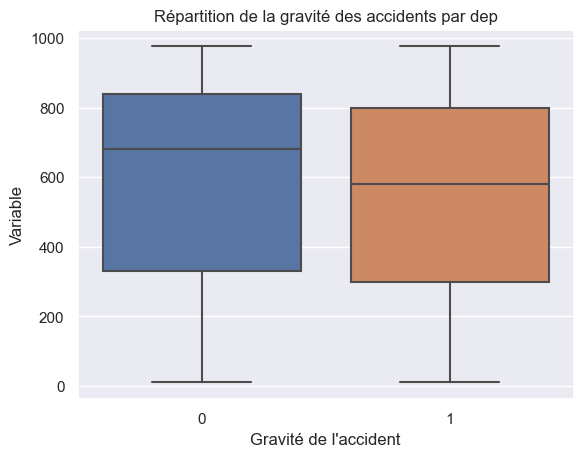

In [144]:
box_plot("dep","new_grav")

Les accidents qui entraînent la mort ou l'hospitalisation se produisent souvent dans les départements où le code du département est dans l'entourage de 75

#### Nombre d'occurrences de la modalité 0 par département

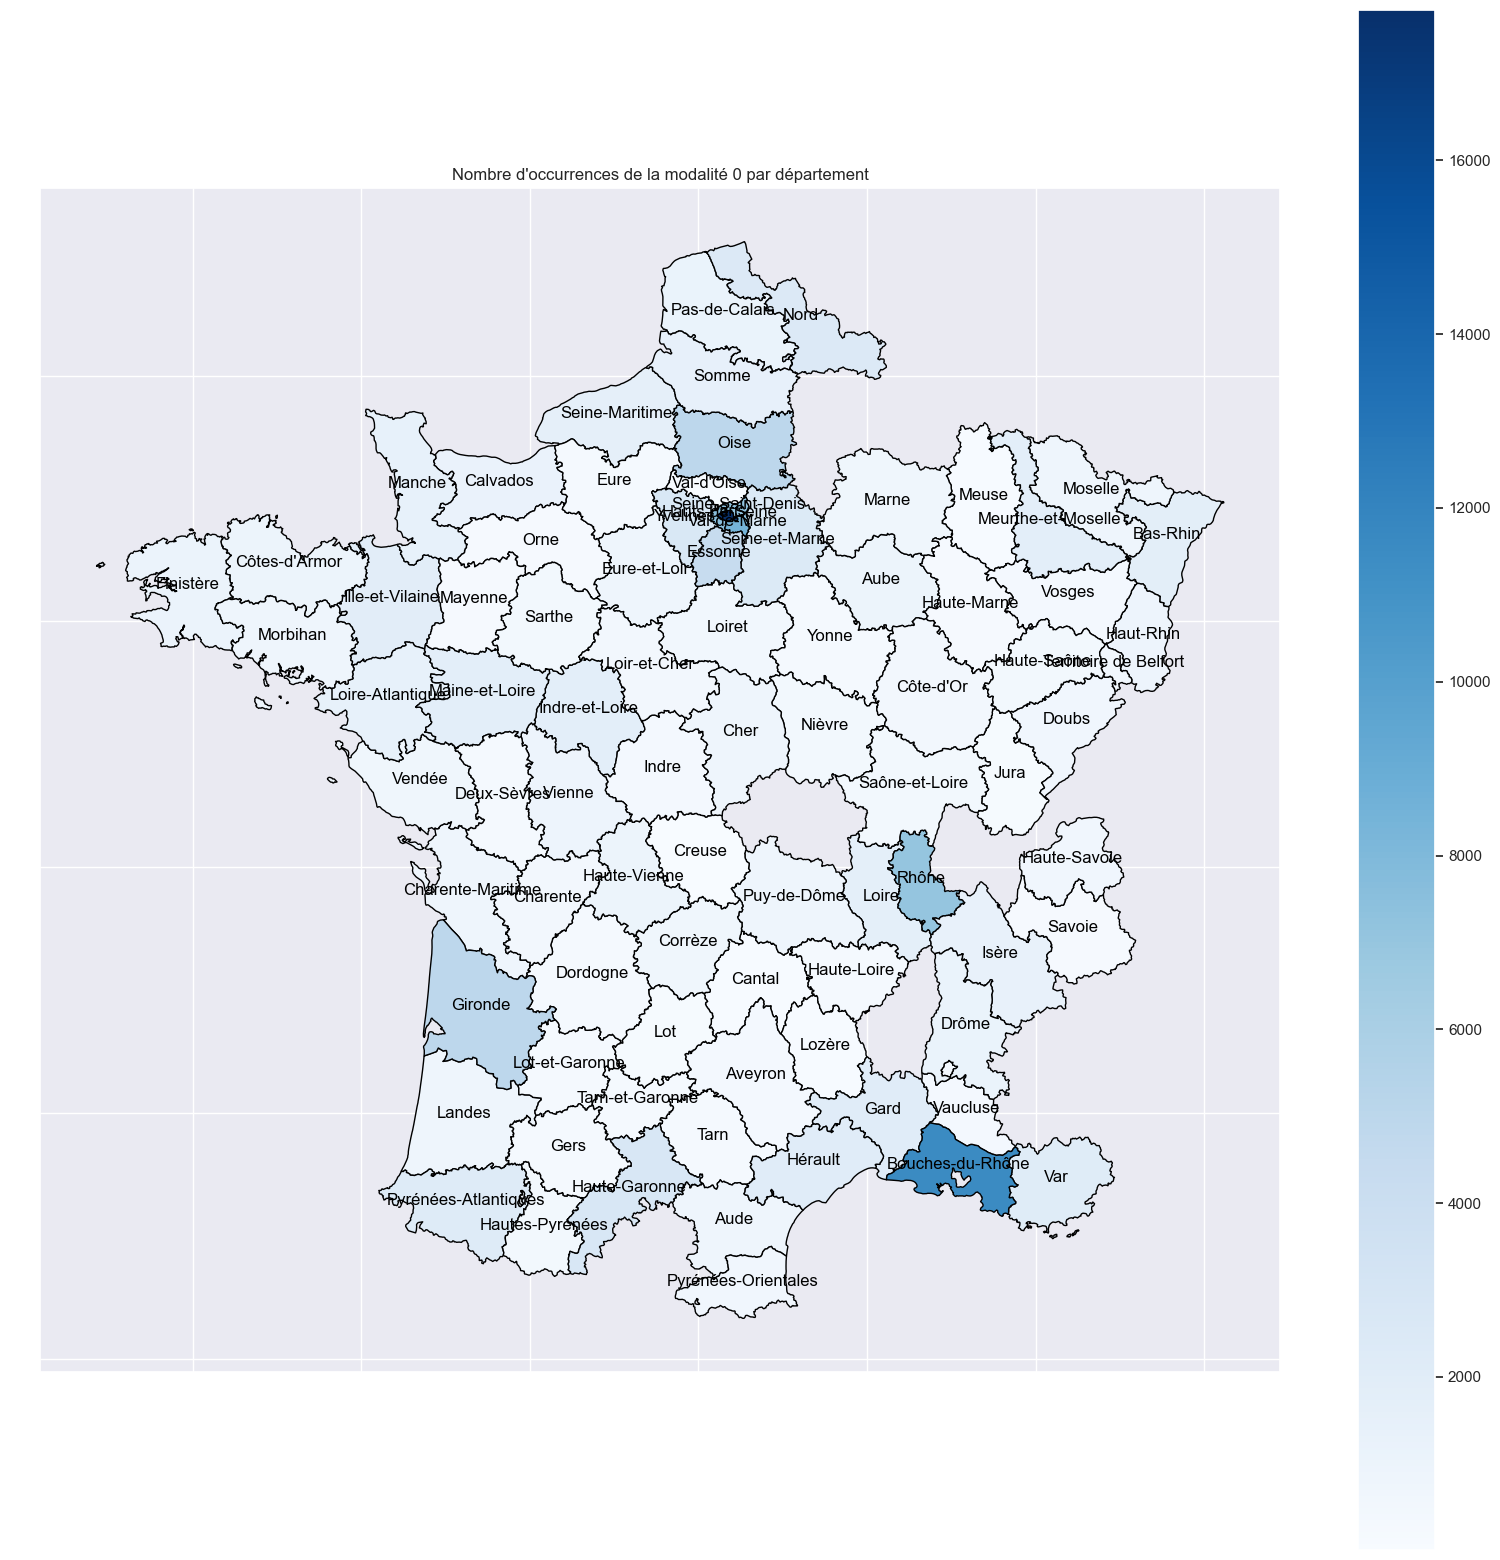

In [145]:
# Group the accidents DataFrame by the "departement" column and count the number of occurrences of the modality 0 from the "new_grav" column
num_mod0 = accidents[accidents['new_grav'] == 0].groupby("departement").size().reset_index(name="num_mod0")


# Merge the two DataFrames based on the "departement" column
merged = pd.merge(departements, num_mod0, on="departement")

# Create a new plot and set the aspect ratio to 'equal'
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')

# Plot the merged GeoDataFrame and add department names to each polygon
for idx, row in merged.iterrows():
    ax.annotate(text=row['departement'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12, color='black')
merged.plot(column="num_mod0", ax=ax, legend=True, cmap='Blues', edgecolor='black')

# Change the color of the degree labels
ax.tick_params(axis='both', colors='white')

# Set the title of the plot
ax.set_title("Nombre d'occurrences de la modalité 0 par département")

# Display the plot
plt.show()

#### Nombre d'occurrences de la modalité 1 par département

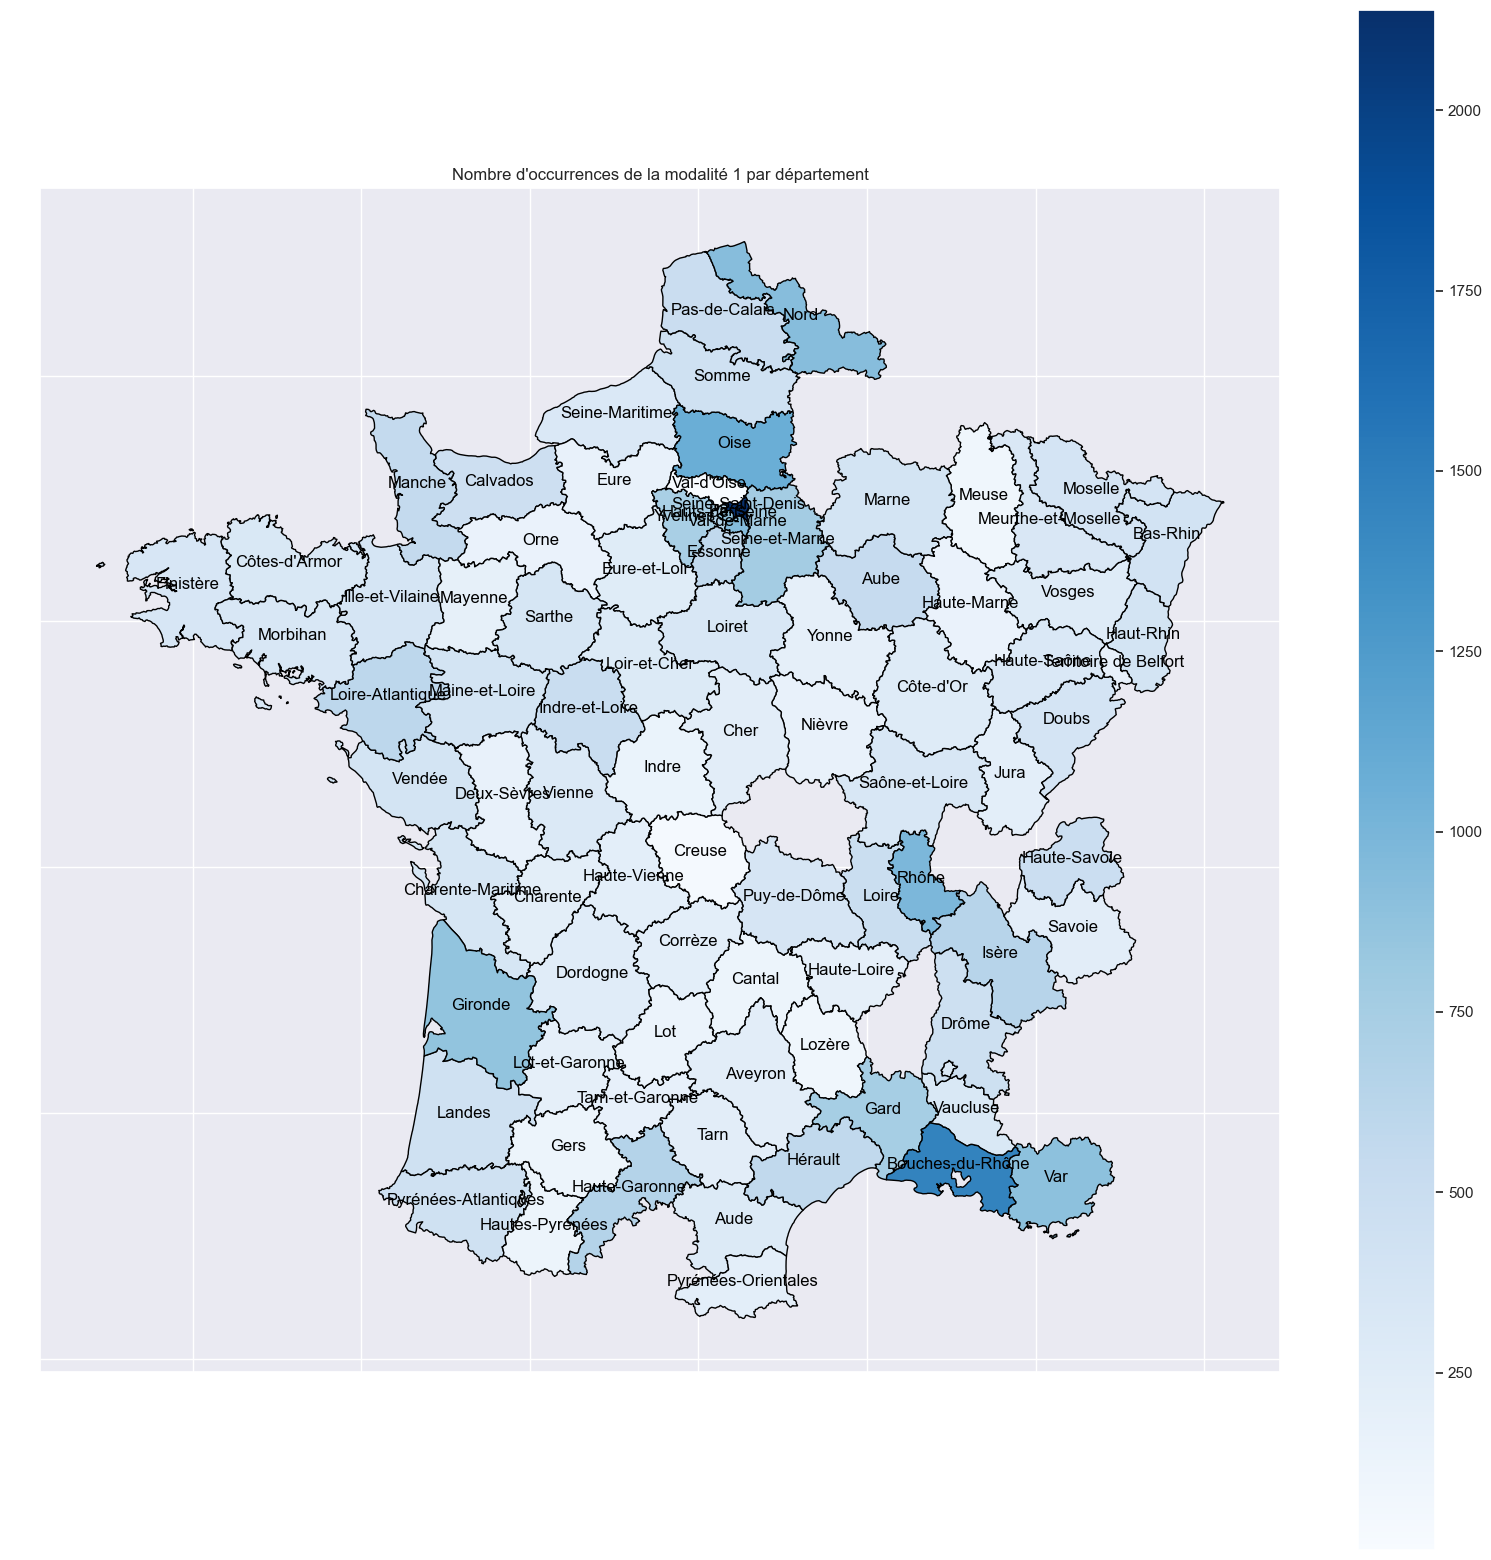

In [146]:
# Group the accidents DataFrame by the "departement" column and count the number of occurrences of the modality 0 from the "new_grav" column
num_mod0 = accidents[accidents['new_grav'] == 1].groupby("departement").size().reset_index(name="num_mod0")


# Liste des départements pour mettre num_accidents à zéro
dept_list = ["Allier", "Ain", "Ardèche", "Nord"]

# Mettre num_accidents à zéro pour les départements sélectionnés
num_mod0.loc[num_accidents['departement'].isin(dept_list), 'num_accidents'] = 0



# Merge the two DataFrames based on the "departement" column
merged = pd.merge(departements, num_mod0, on="departement")

# Create a new plot and set the aspect ratio to 'equal'
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')

# Set the background color of the plot


# Plot the merged GeoDataFrame and add department names to each polygon
for idx, row in merged.iterrows():
    ax.annotate(text=row['departement'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12, color='black')
merged.plot(column="num_mod0", ax=ax, legend=True, cmap='Blues', edgecolor='black')

# Change the color of the degree labels
ax.tick_params(axis='both', colors='white')

# Set the title of the plot
ax.set_title("Nombre d'occurrences de la modalité 1 par département")

# Display the plot
plt.show()

In [147]:
accidents.to_csv("data/accidents_avec_nan.csv")

### Prétraitement des données

Tant que toutes les variables de l'ensemble de données sont sous le format de catégories, nous ne pouvons effectuer aucune opération pour remplir les valeurs NaN avec une moyenne ou une médiane, on va les remplir par la valeur la plus fréquentes de chaque colonne,

In [148]:
#Affichage des Nan en %

missing_values = pd.DataFrame((accidents.isna().mean()*100).sort_values())
missing_values.columns = ['Valeurs manquantes en %']
missing_values

Valeurs manquantes en %
departement                 0.000000
new_grav                    0.002244
catv                        0.002244
senc                        0.002244
an_nais                     0.002244
trajet                      0.002244
sexe                        0.002244
grav                        0.002244
catu                        0.002244
surf                        0.002244
num_vict                    0.002244
plan                        0.002244
prof                        0.002244
Num_Acc                     0.002244
atm                         0.002244
mois                        0.002244
jour                        0.002244
hrmn                        0.002244
lum                         0.002244
agg                         0.002244
int                         0.002244
circ                        0.002244
col                         0.002244
larrout                     0.002244
com                         0.002244
dep                         0.002244
catr                        0.002244
situ                        0.008977
choc                        0.010099
env1                        0.012904
manv                        0.020197
infra                       0.025247
obs                         0.028613
vosp                        0.029174
obsm                        0.049932
locp                        0.063958
nbv                         0.079106
lartpc                      0.265371
place                       4.791827
voie                        5.046538

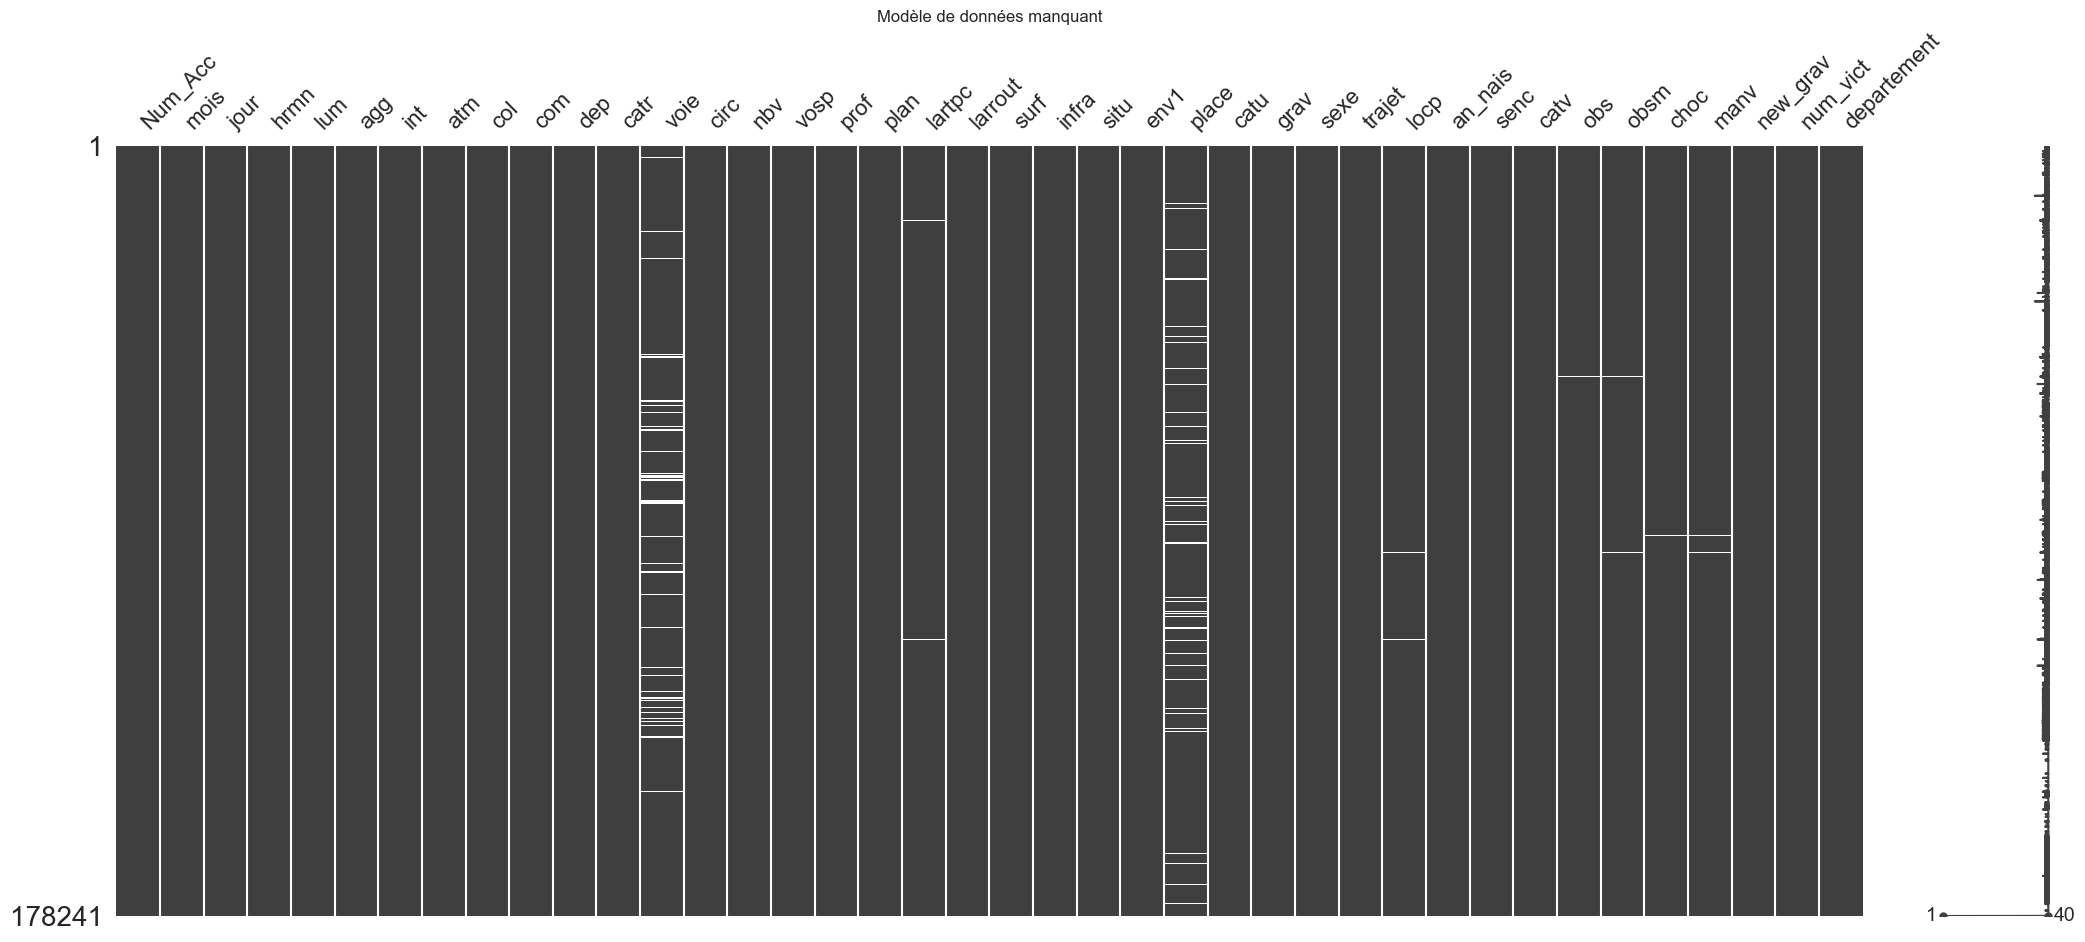

In [149]:
import missingno as msno
msno.matrix(accidents)
plt.title('Modèle de données manquant')
plt.show()

In [150]:
accidents.shape

(178241, 40)

In [151]:
accidents.isnull().sum()

Num_Acc           4
mois              4
jour              4
hrmn              4
lum               4
agg               4
int               4
atm               4
col               4
com               4
dep               4
catr              4
voie           8995
circ              4
nbv             141
vosp             52
prof              4
plan              4
lartpc          473
larrout           4
surf              4
infra            45
situ             16
env1             23
place          8541
catu              4
grav              4
sexe              4
trajet            4
locp            114
an_nais           4
senc              4
catv              4
obs              51
obsm             89
choc             18
manv             36
new_grav          4
num_vict          4
departement       0
dtype: int64

In [152]:
for col in accidents.columns:
    accidents[col].fillna(accidents[col].mode()[0], inplace=True)

In [153]:
accidents.isnull().sum()

Num_Acc        0
mois           0
jour           0
hrmn           0
lum            0
agg            0
int            0
atm            0
col            0
com            0
dep            0
catr           0
voie           0
circ           0
nbv            0
vosp           0
prof           0
plan           0
lartpc         0
larrout        0
surf           0
infra          0
situ           0
env1           0
place          0
catu           0
grav           0
sexe           0
trajet         0
locp           0
an_nais        0
senc           0
catv           0
obs            0
obsm           0
choc           0
manv           0
new_grav       0
num_vict       0
departement    0
dtype: int64

In [154]:
accidents=accidents.drop("departement",axis=1)
accidents=accidents.drop("num_vict",axis=1)
accidents=accidents.drop("grav",axis=1)
accidents=accidents.drop("Num_Acc",axis=1)

In [155]:
accidents.to_csv("data/accidents_cleaned.csv")

In [3]:
import pandas as pd 
df=pd.read_csv("data/accidents_cleaned.csv")

In [5]:
df.iloc[4]

Unnamed: 0           4
mois              10.0
jour              12.0
hrmn          11:45:00
lum                  1
agg                  1
int                  1
atm                  3
col                  1
com              142.0
dep                 22
catr                 3
voie              14.0
circ                 2
nbv                0.0
vosp                 0
prof                 4
plan                 2
lartpc            70.0
larrout            0.0
surf                 2
infra                0
situ                 1
env1              99.0
place              1.0
catu                 1
sexe                 1
trajet               5
locp                 0
an_nais         1971.0
senc                 0
catv                 7
obs                  0
obsm                 2
choc                 3
manv                13
new_grav             1
Name: 4, dtype: object